In [3]:
import scipy.optimize
def find_hungarian(prev_frame, cur_frame, num_points):
    weights = np.zeros((np.shape(prev_frame)[0],np.shape(cur_frame)[0]))
    for i in range(np.shape(prev_frame)[0]):
        prev_point = prev_frame[i,:]
        for j in range(np.shape(cur_frame)[0]):
            weights[i,j] = np.linalg.norm(prev_frame[i,:] - cur_frame[j,:])
    row_ind, col_ind = scipy.optimize.linear_sum_assignment(weights)
    permute = [0]*num_points
    for i in range(len(row_ind)):
        permute[row_ind[i]] = col_ind[i]
    return cur_frame[permute,:]
    

In [4]:
import csv
import numpy as np
%matplotlib notebook
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

def manual_assignment(input_file, num_points, frame_num):
    data_array = np.zeros((0,num_points,3))

    with open(input_file) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count < frame_num:
                pass
                line_count += 1
            else:
                detected_points = (len(row))/5
                current_row = np.zeros((num_points,3))
                for i in range(num_points):
                    current_row[i,:] = row[2+5*i:2+5*i+3]
                current_row = np.expand_dims(current_row, axis=0)
                data_array = np.append(data_array, current_row, axis=0)
                break
    for i in range(num_points):
        colors = ['g']*num_points
        colors[i] = 'r'
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        plt.title(str(i))
        ax.scatter3D(data_array[0,:,0], data_array[0,:,1], data_array[0,:,2],c=colors);
        
        
    

In [5]:
import csv
import numpy as np

def find_assignment(input_file, num_points, start_point_mapping, start_index):
    data_array = np.zeros((0,num_points,3))

    with open(input_file) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count < start_index:
                pass
                line_count += 1
            elif line_count == start_index:
                detected_points = (len(row))/5
                current_row = np.zeros((num_points,3))
                for i in range(num_points):
                    current_row[start_point_mapping[i],:] = row[2+5*i:2+5*i+3]
                current_row = np.expand_dims(current_row, axis=0)
                data_array = np.append(data_array, current_row, axis=0)
                line_count +=1
            else:
                detected_points = (len(row)-1)/5
                if detected_points < num_points:
                    continue
                current_row = np.zeros((num_points,3))
                for i in range(num_points):
                    current_row[i,:] = row[2+5*i:2+5*i+3]
                #best_permutation_row = find_permutation(data_array[-1,:,:], current_row)
                best_permutation_row = find_hungarian(data_array[-1,:,:], current_row, num_points)
                best_permutation_row = np.expand_dims(best_permutation_row,axis=0)
                data_array = np.append(data_array, best_permutation_row, axis=0)
                line_count += 1
    return data_array
    

In [6]:
%matplotlib notebook
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
def plot_data(data_array, data_range):
    colors = ['r','g','b','c','y','m','k','r','g']
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    point_num = 0
    for point_num in data_range:
        ax.scatter3D(data_array[point_num,:,0], data_array[point_num,:,1], data_array[point_num,:,2],c=colors);


In [7]:
def plot_link_lengths(data_array):
    links = np.array([[0,1],[1,2],[2,3],[3,4],[0,5],[5,6],[6,7],[7,8],[1,5]])
    for link in links:
        distances = np.linalg.norm(data_array[:,link[0],:] - data_array[:,link[1],:], axis=1)
        fig = plt.figure()
        ax = plt.axes()
        plt.title(str(link))
        ax.plot(distances)

<IPython.core.display.Javascript object>


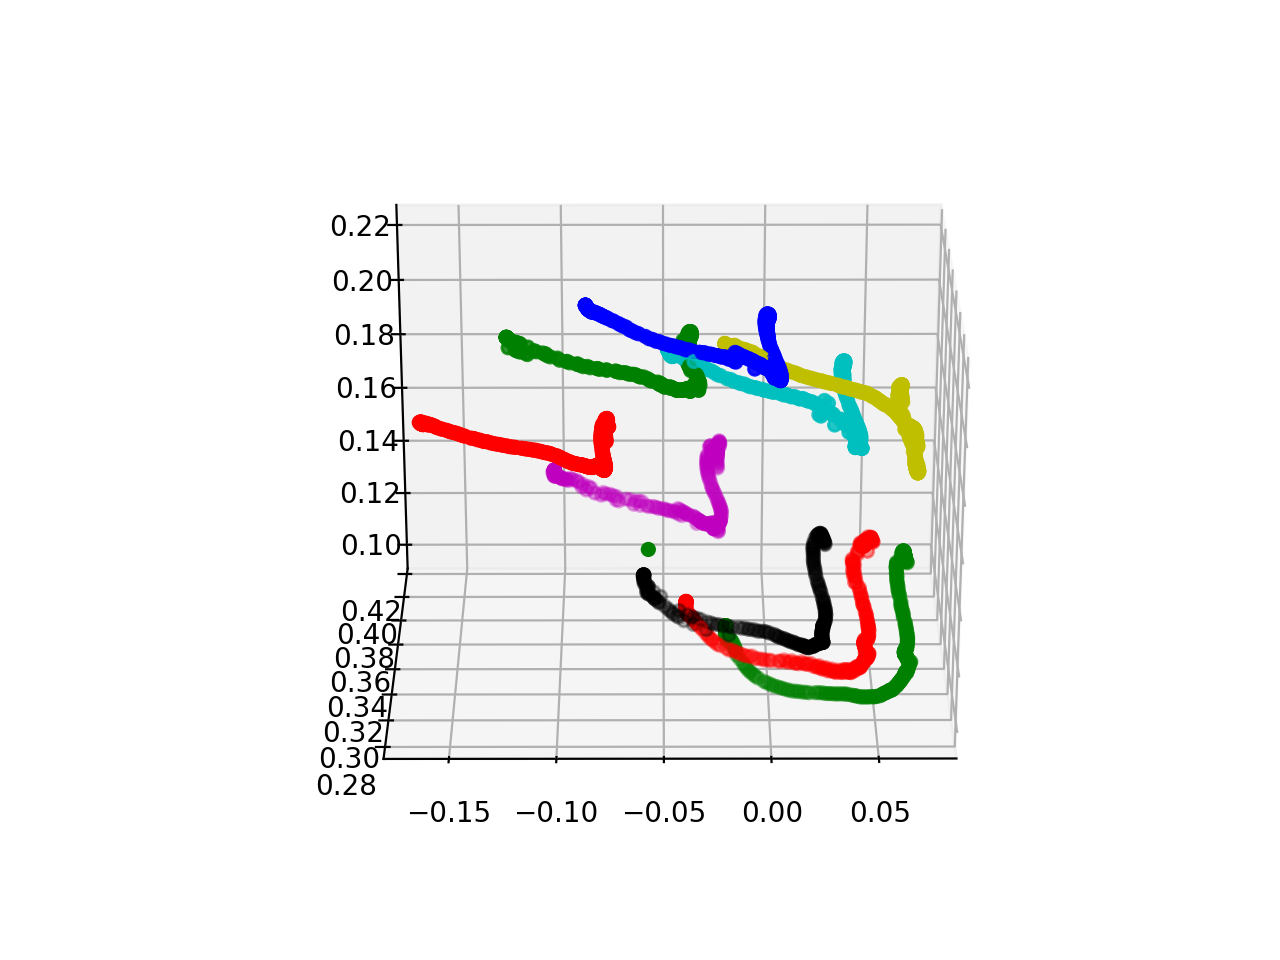

<IPython.core.display.Javascript object>


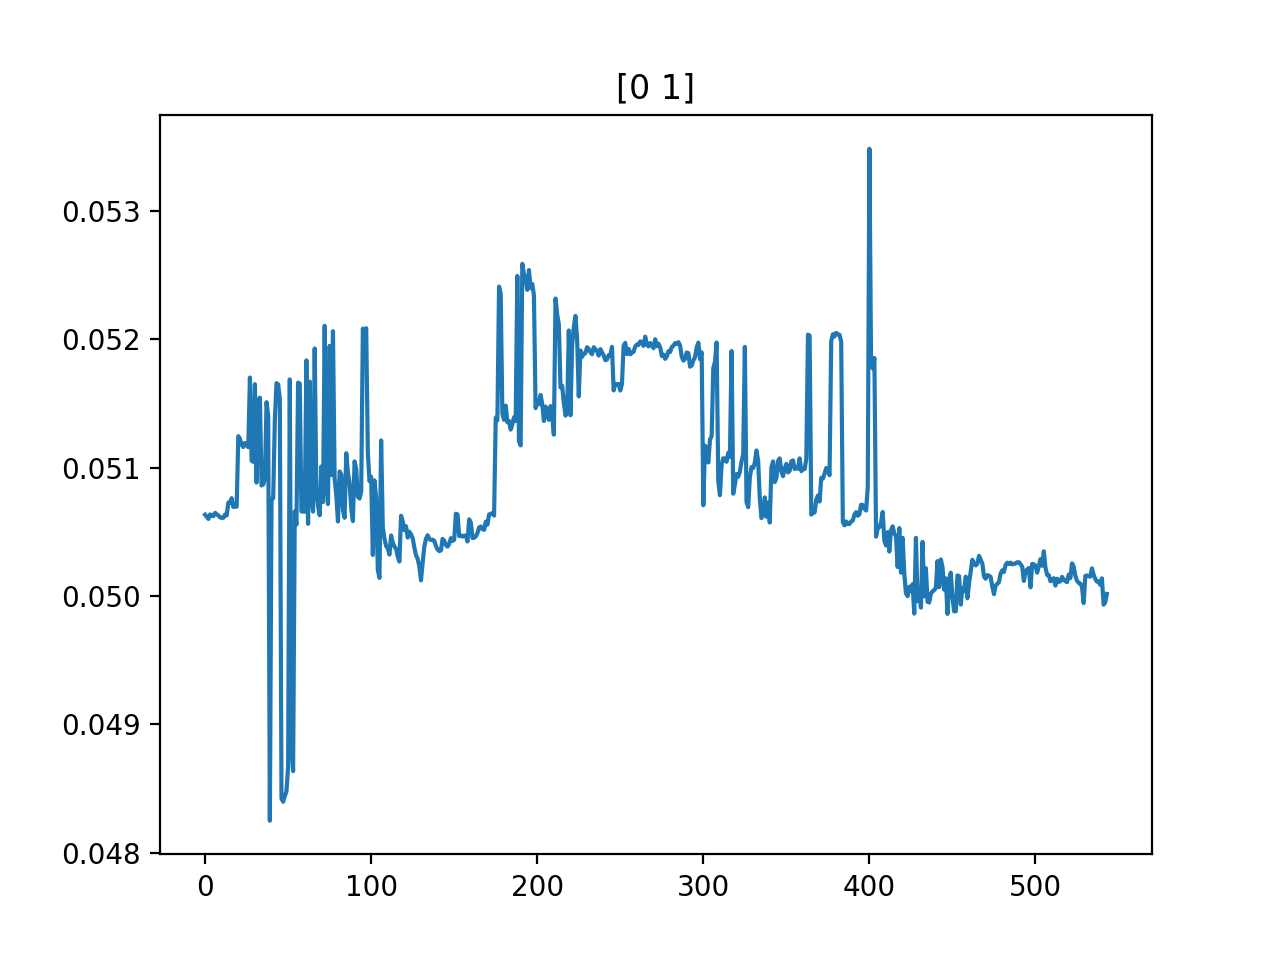

<IPython.core.display.Javascript object>


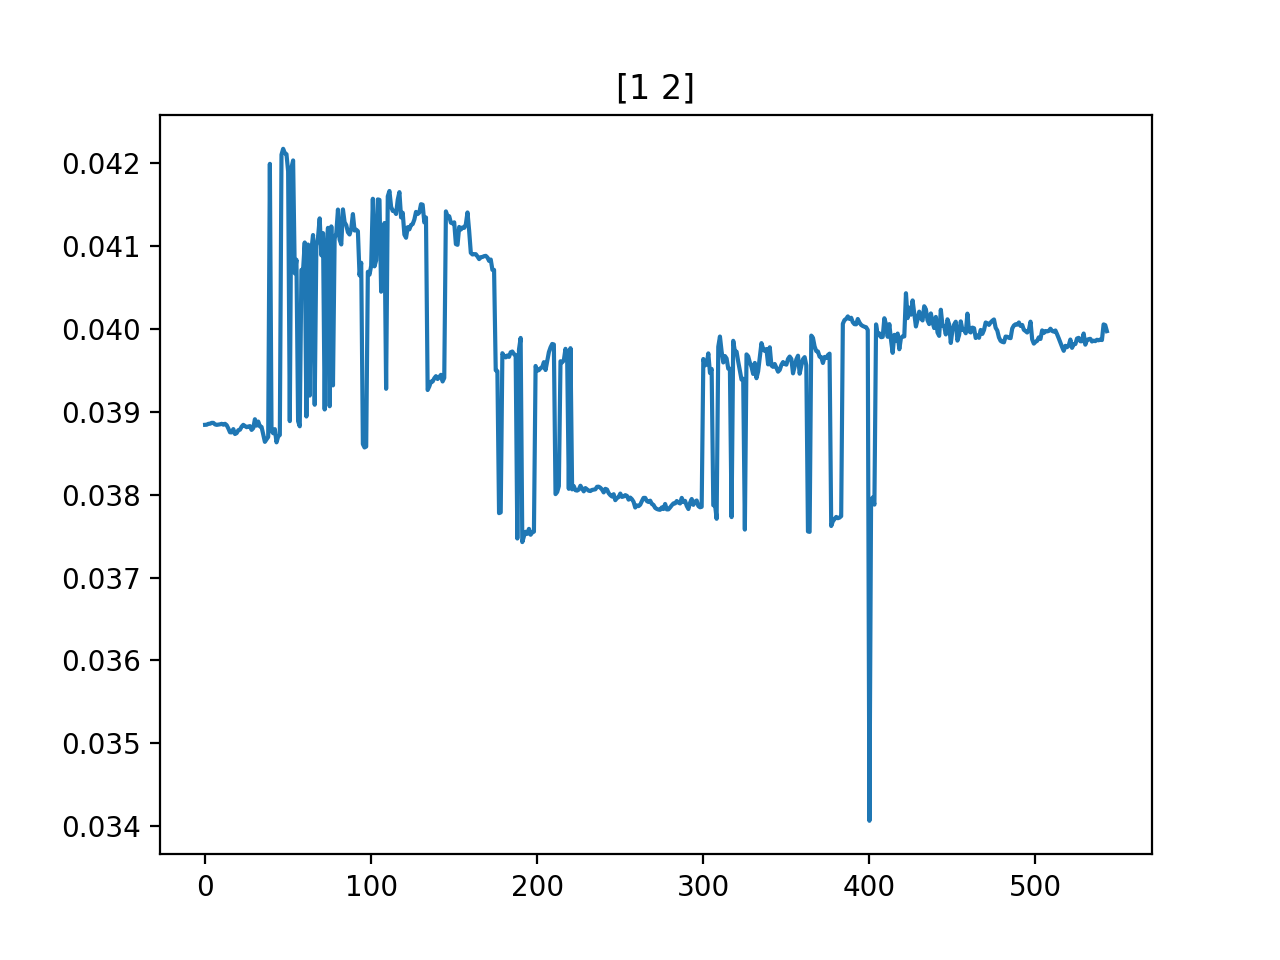

<IPython.core.display.Javascript object>


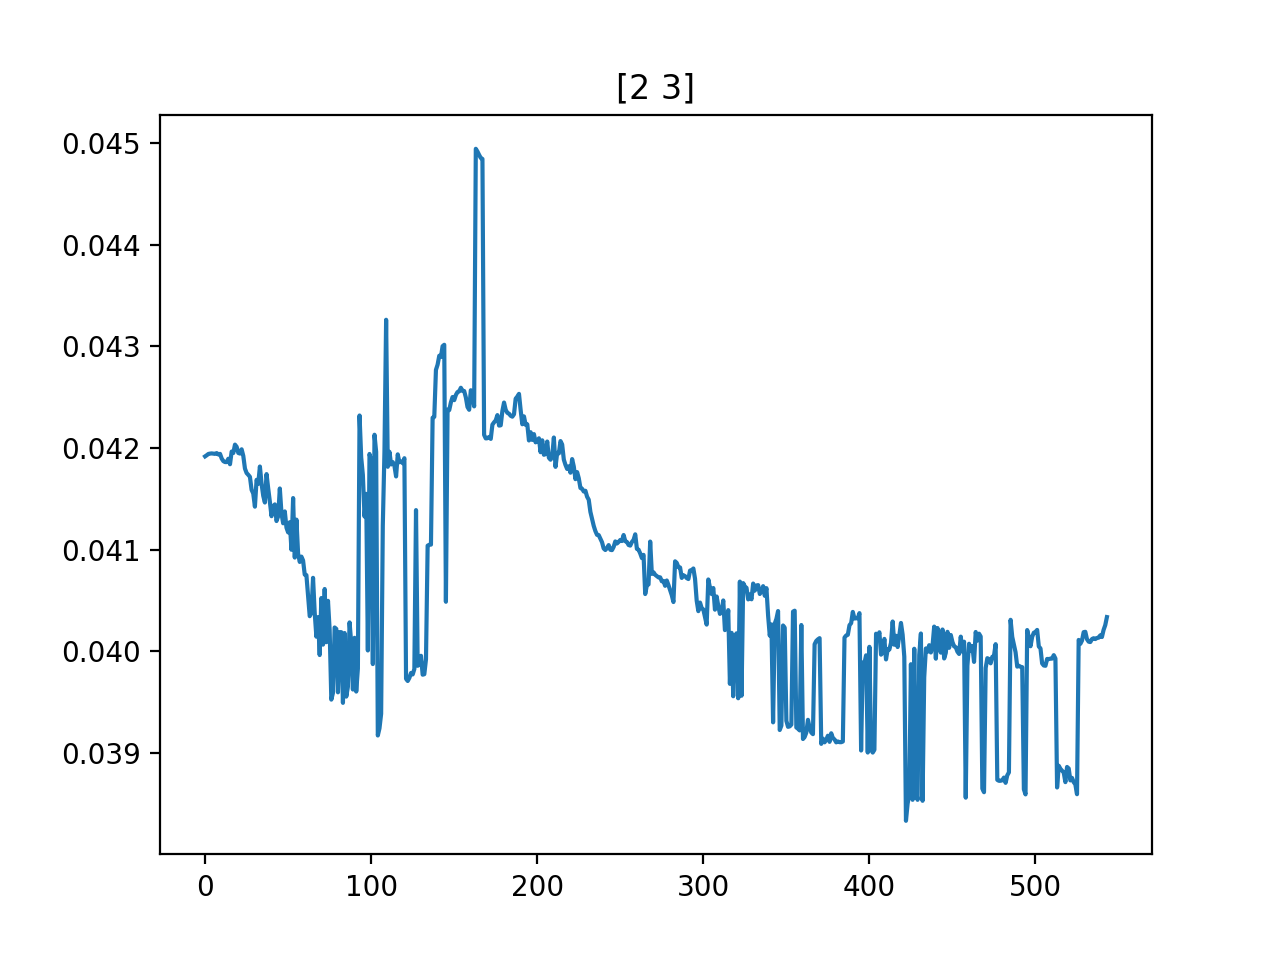

<IPython.core.display.Javascript object>


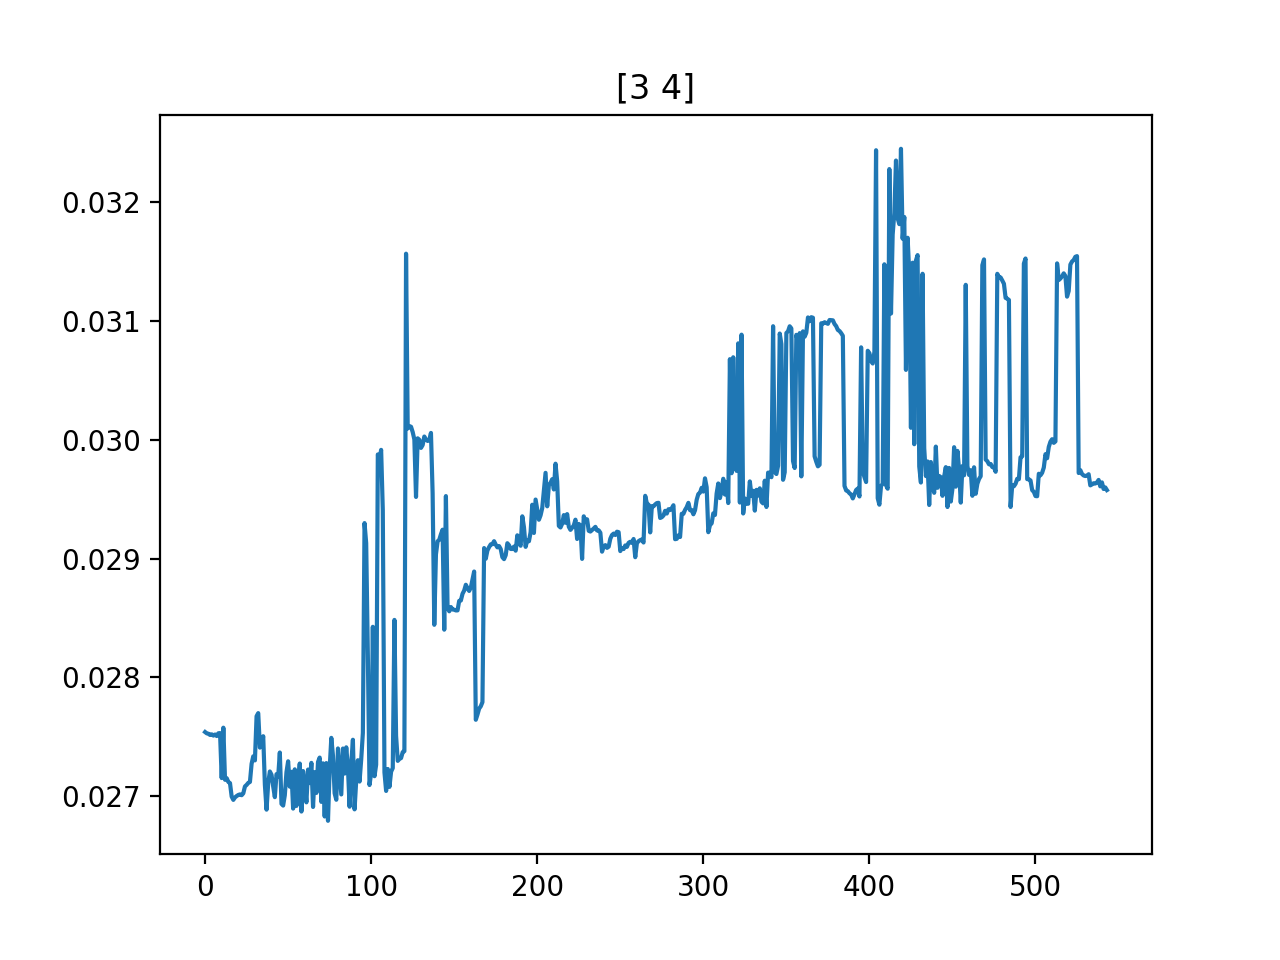

<IPython.core.display.Javascript object>


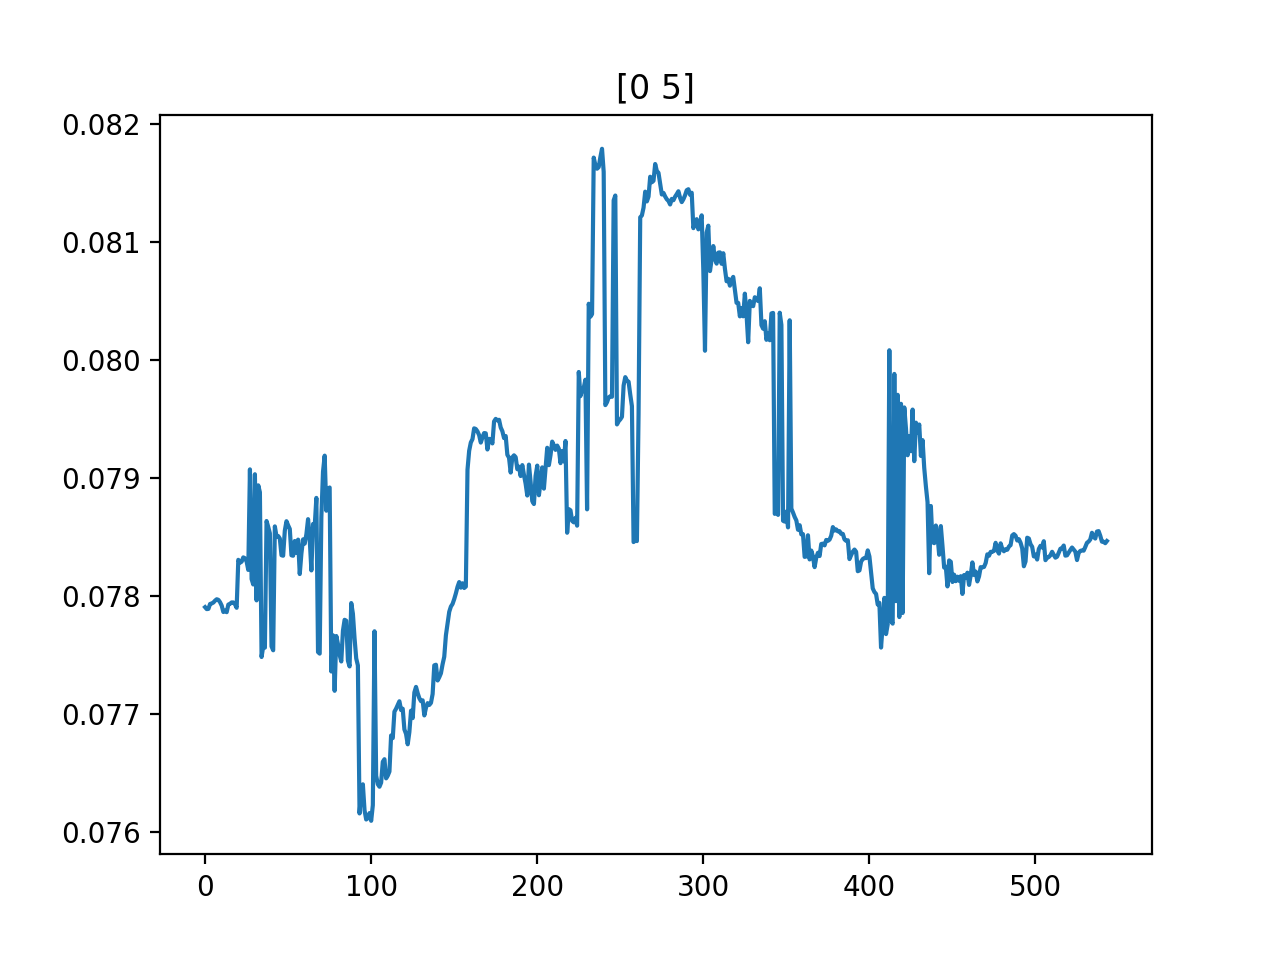

<IPython.core.display.Javascript object>


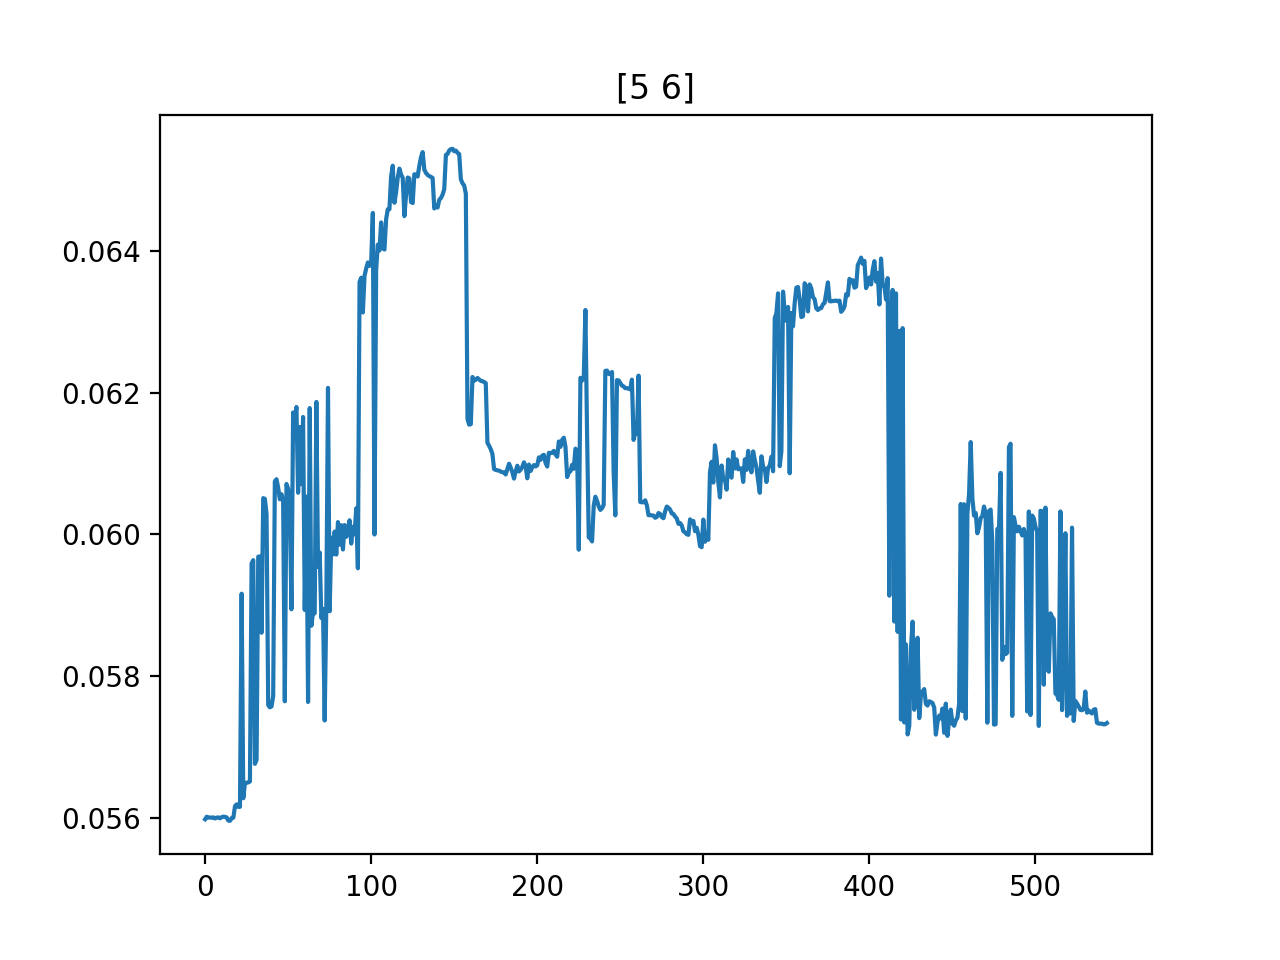

<IPython.core.display.Javascript object>


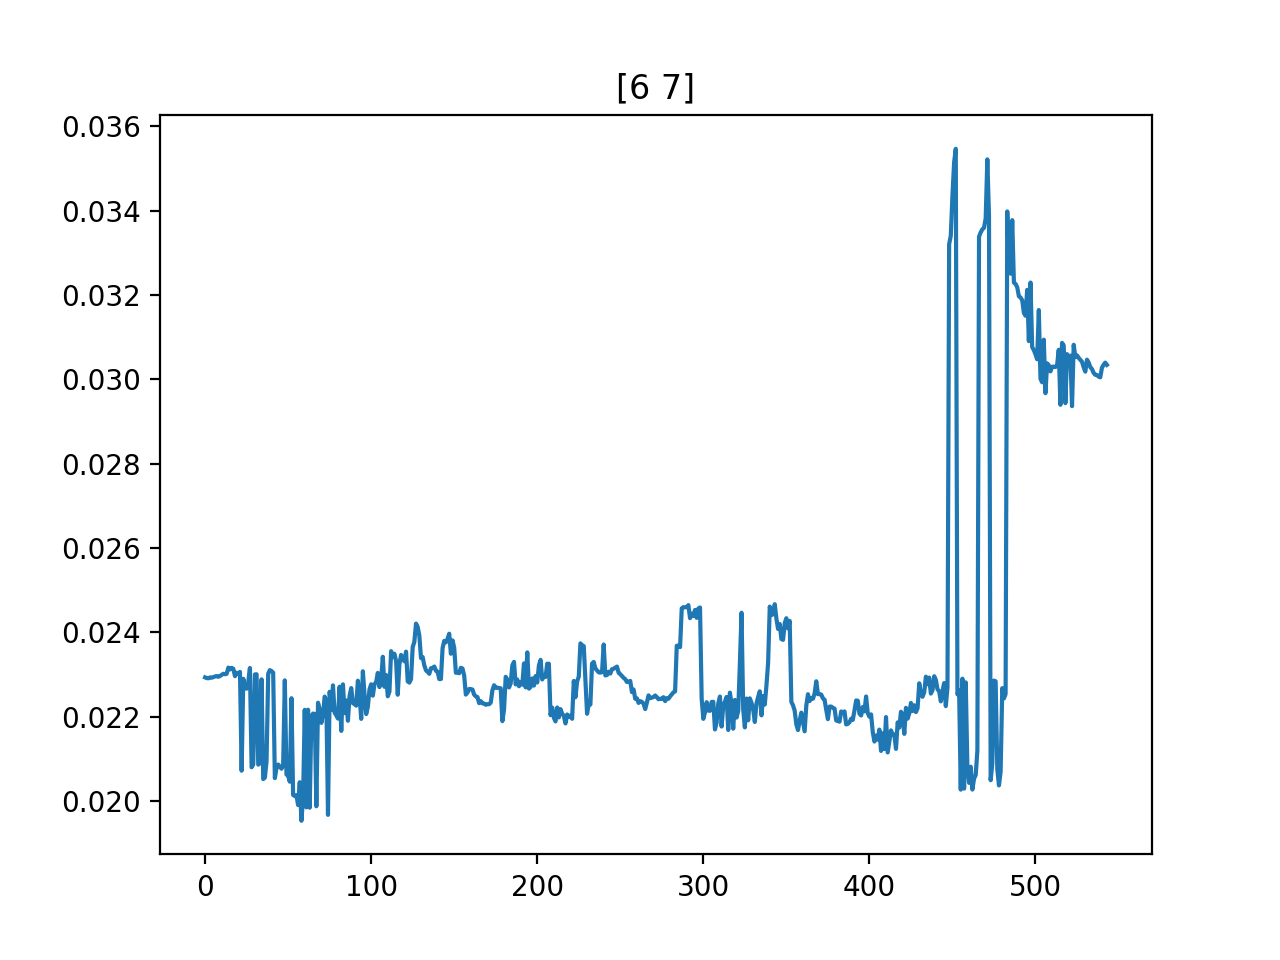

<IPython.core.display.Javascript object>


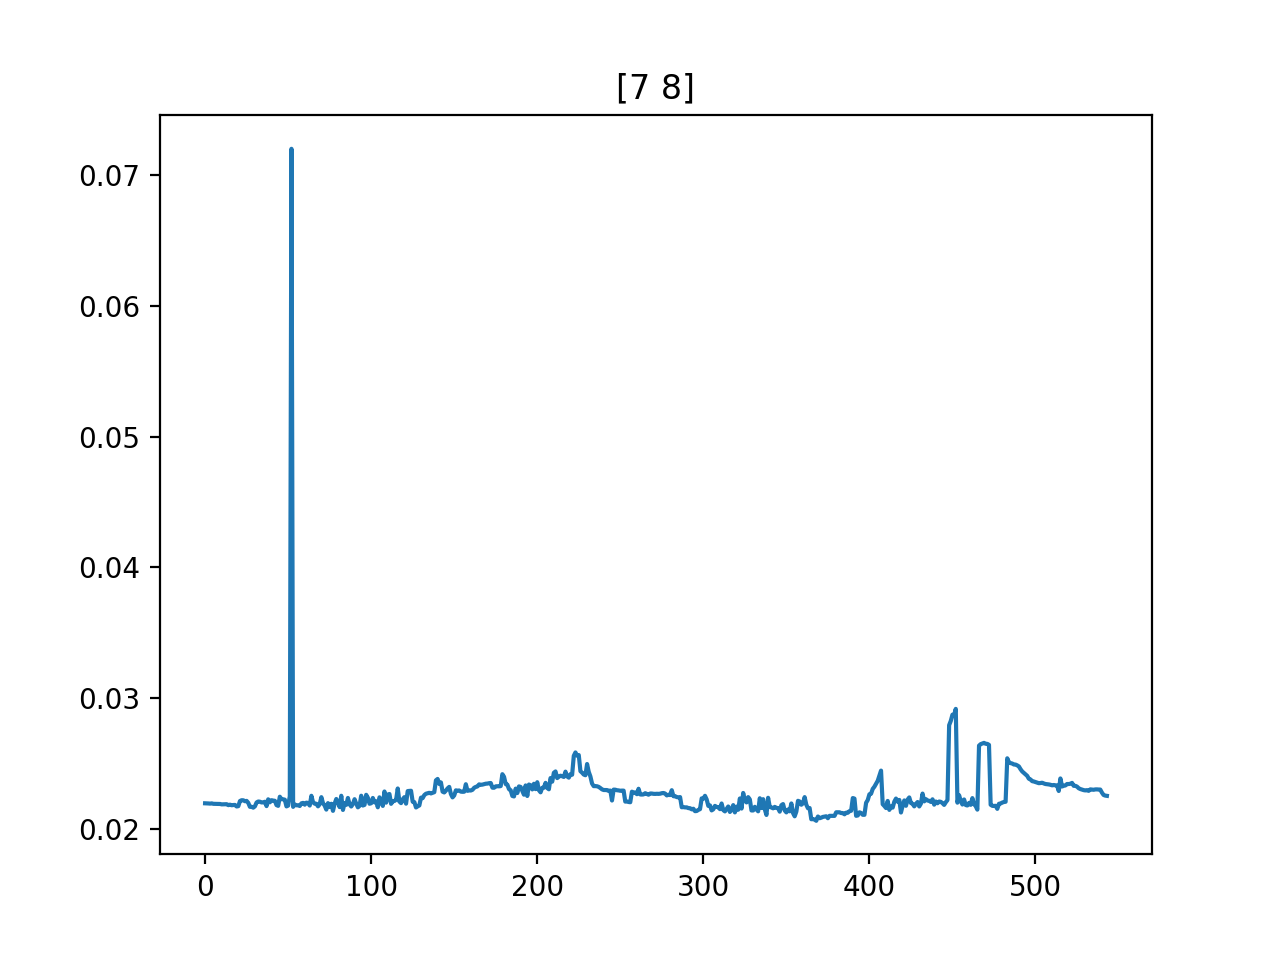

<IPython.core.display.Javascript object>


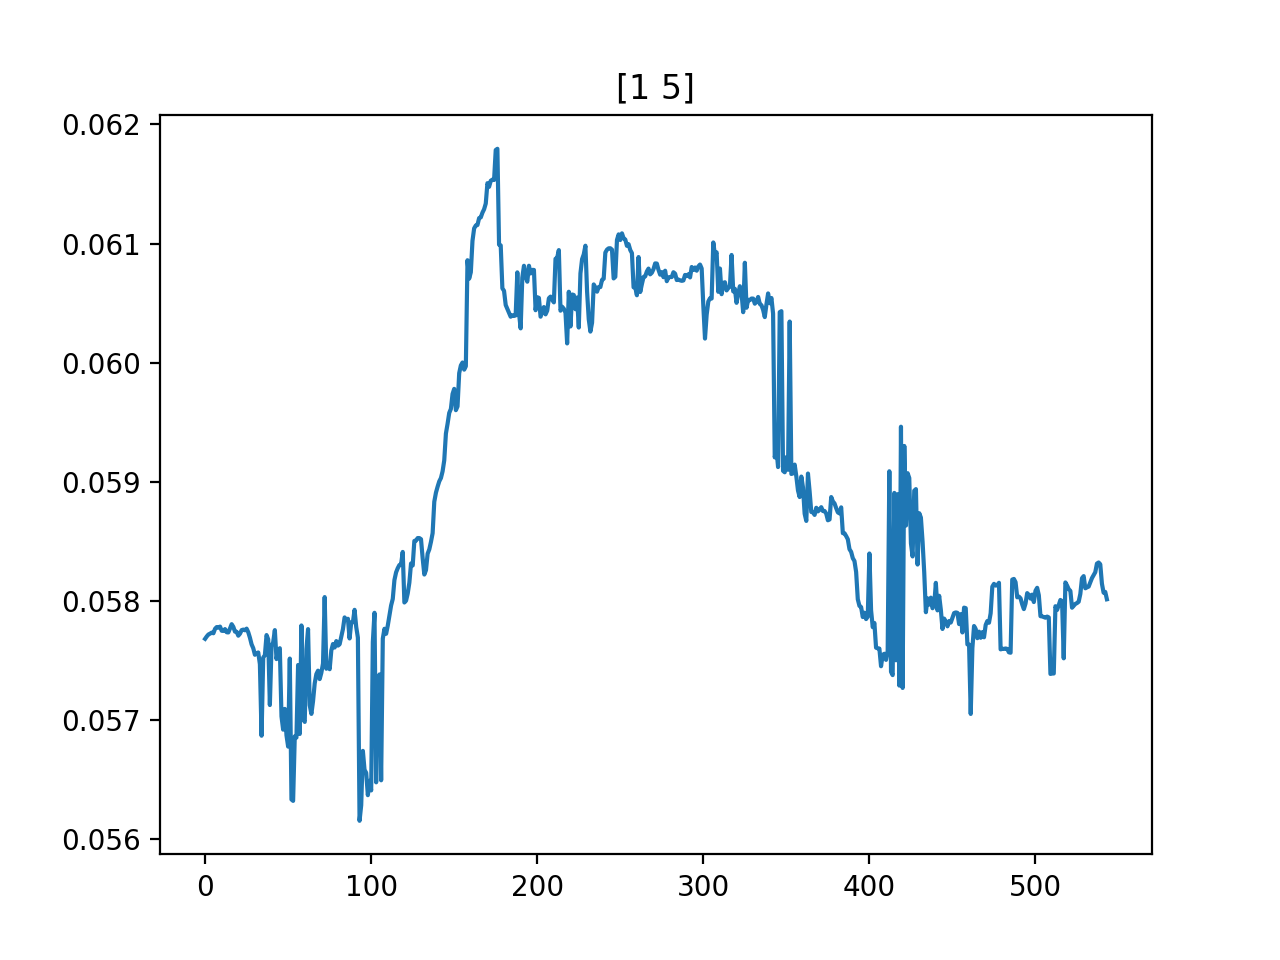

In [17]:
input_file = "vicon_data1/T02_15_2020-sLifting _Sample/t0/mMotionTracking-T02_15_2020-sLifting _Sample-t0-mocap.csv"
num_points = 9
start_index = 10
#manual_assignment(input_file, num_points, start_index)
point_mapping = [6,1,3,5,0,8,2,4,7]
data_array = find_assignment(input_file, num_points, point_mapping, start_index)
plot_data(data_array, range(0,300))
plot_link_lengths(data_array)

<IPython.core.display.Javascript object>


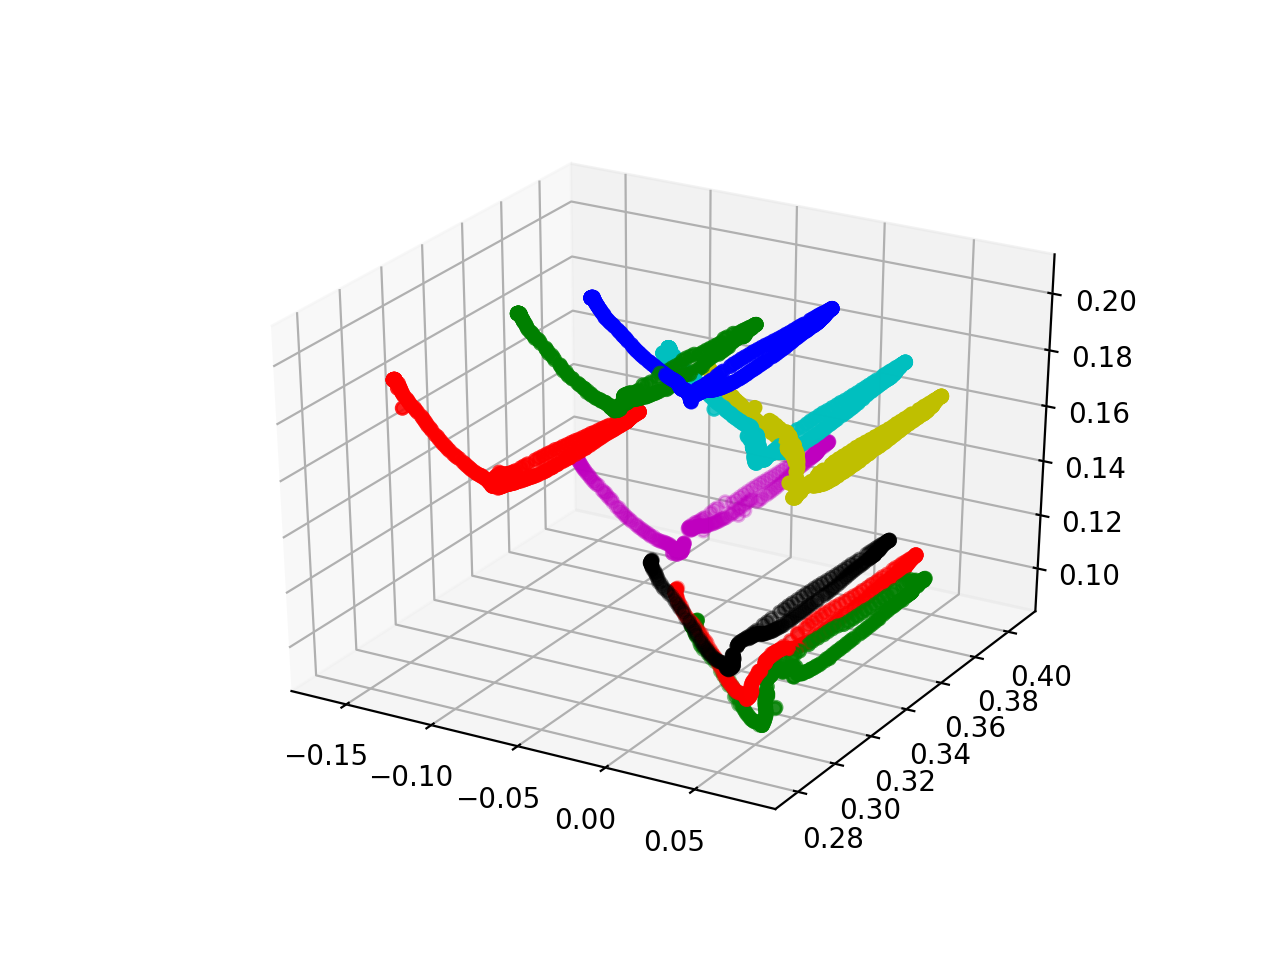

<IPython.core.display.Javascript object>


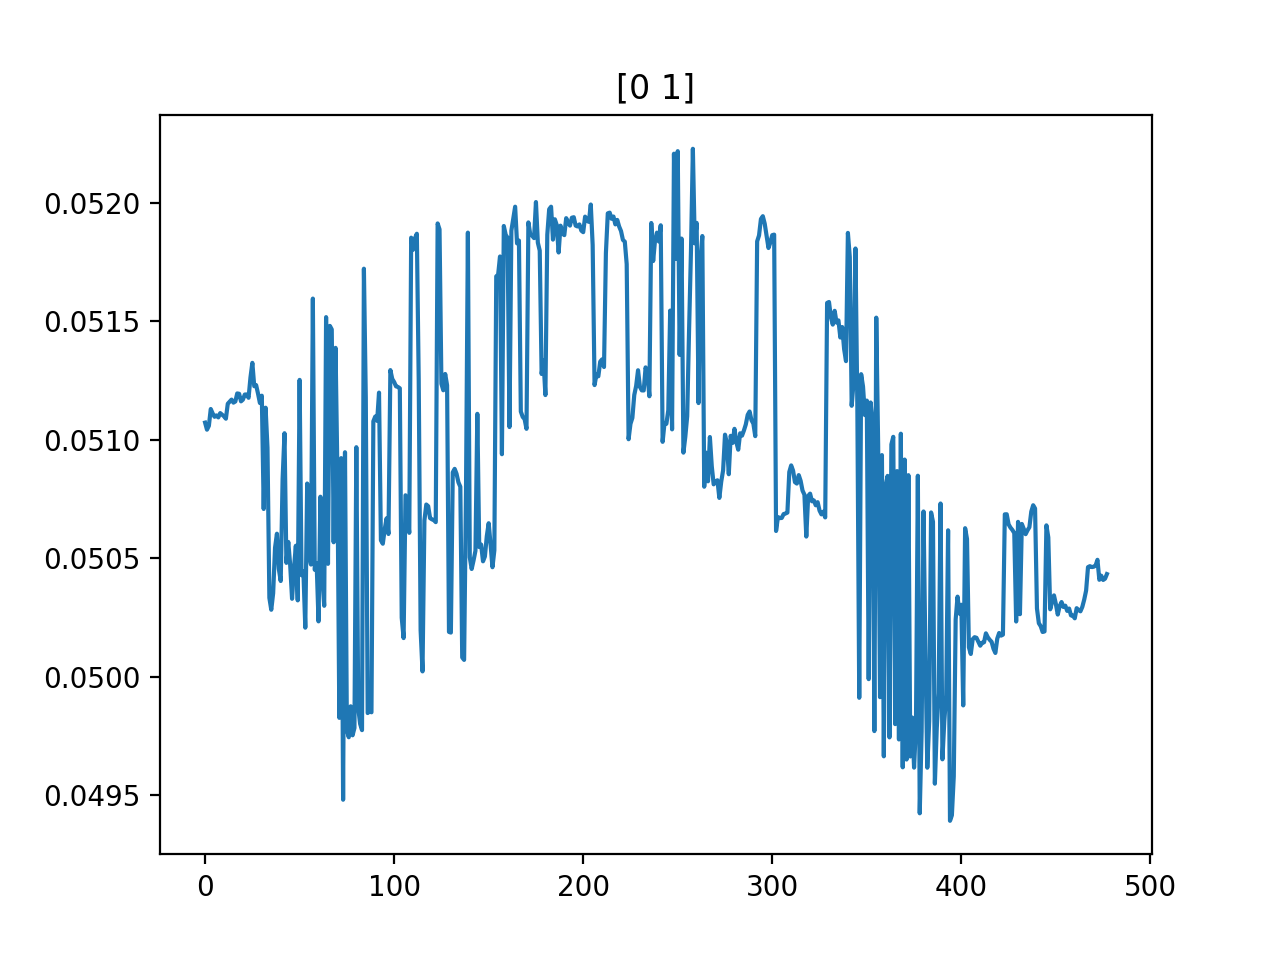

<IPython.core.display.Javascript object>


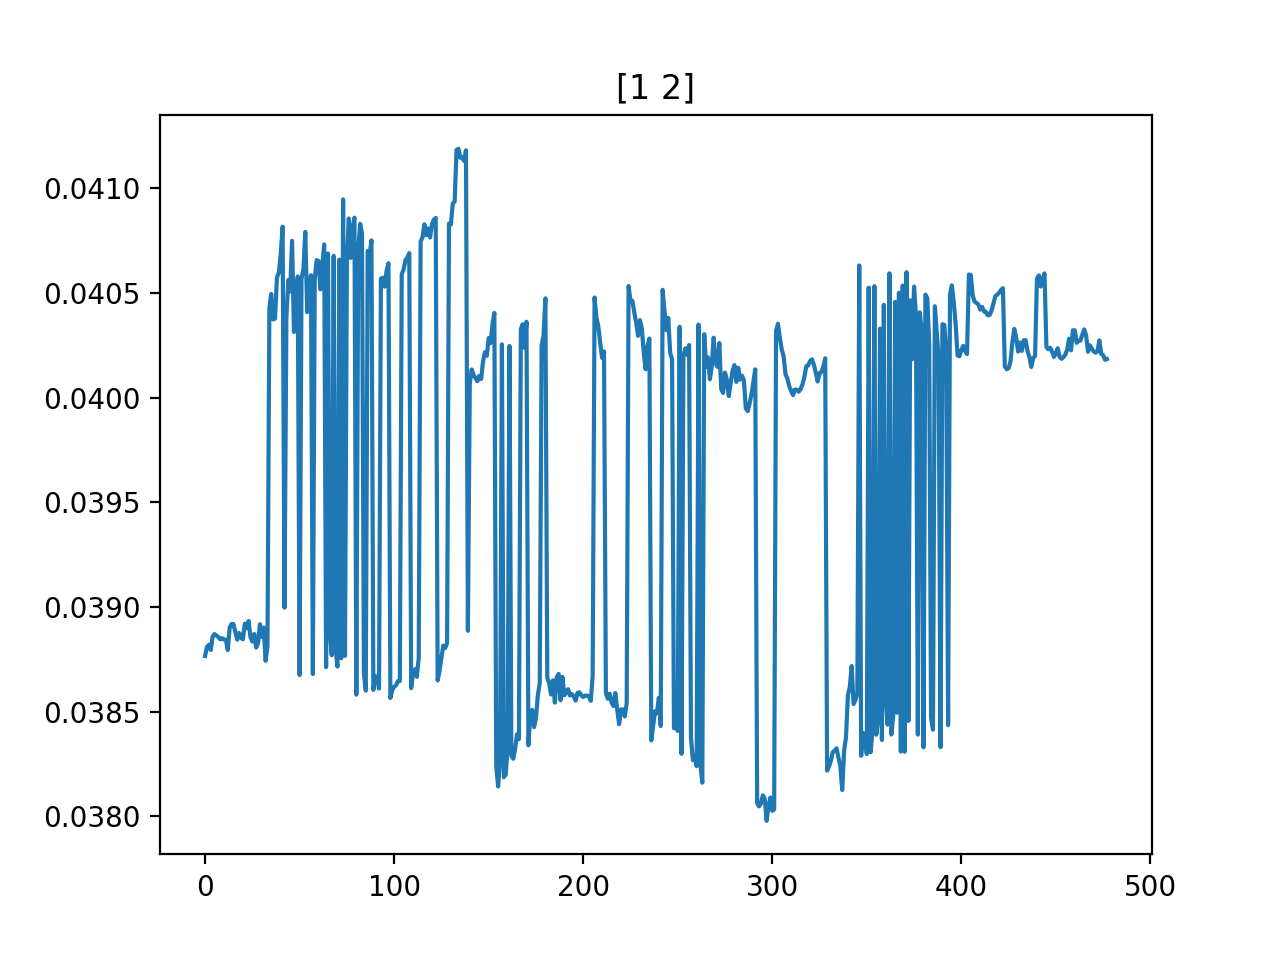

<IPython.core.display.Javascript object>


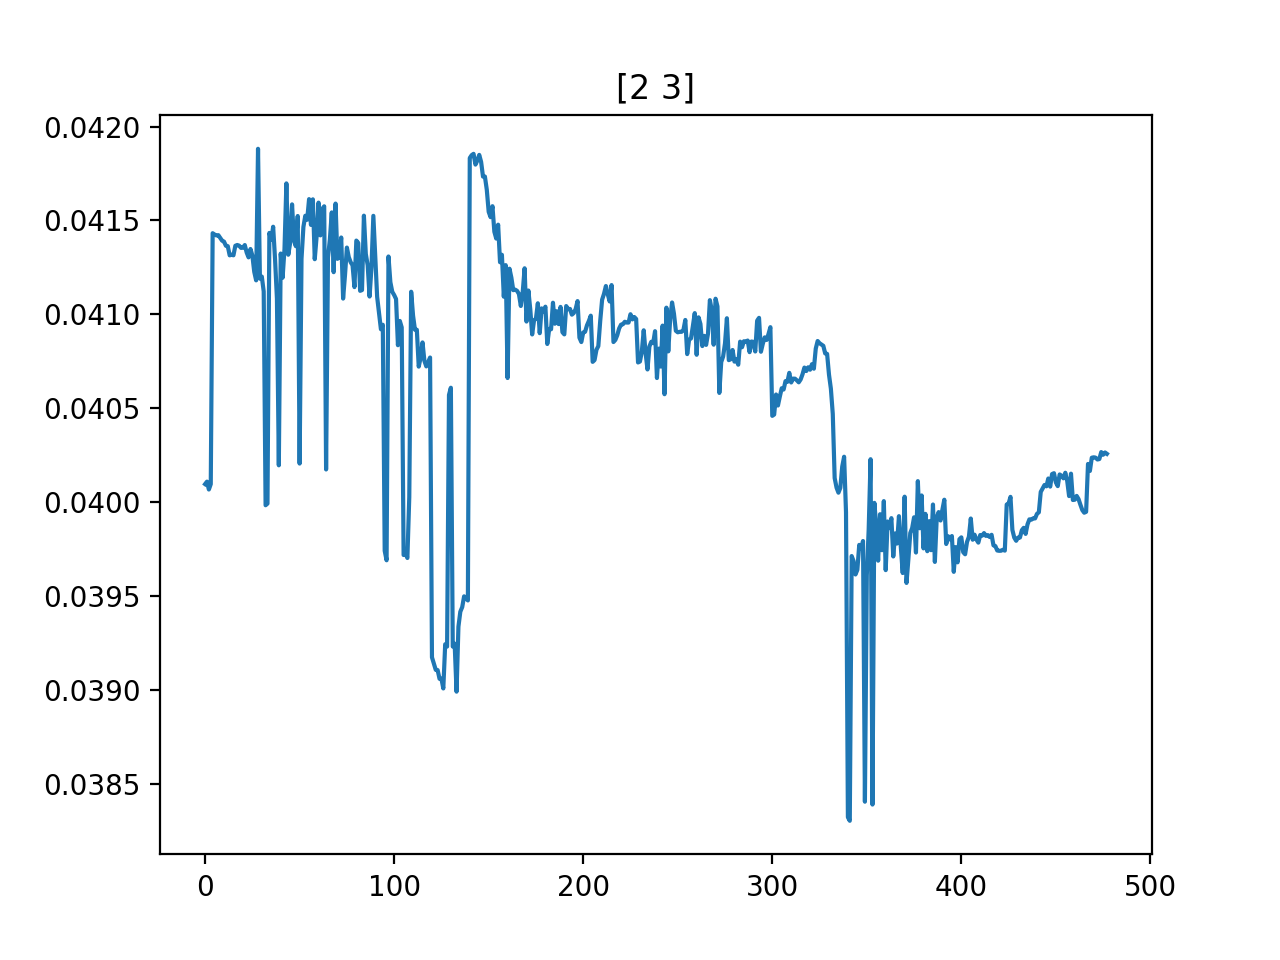

<IPython.core.display.Javascript object>


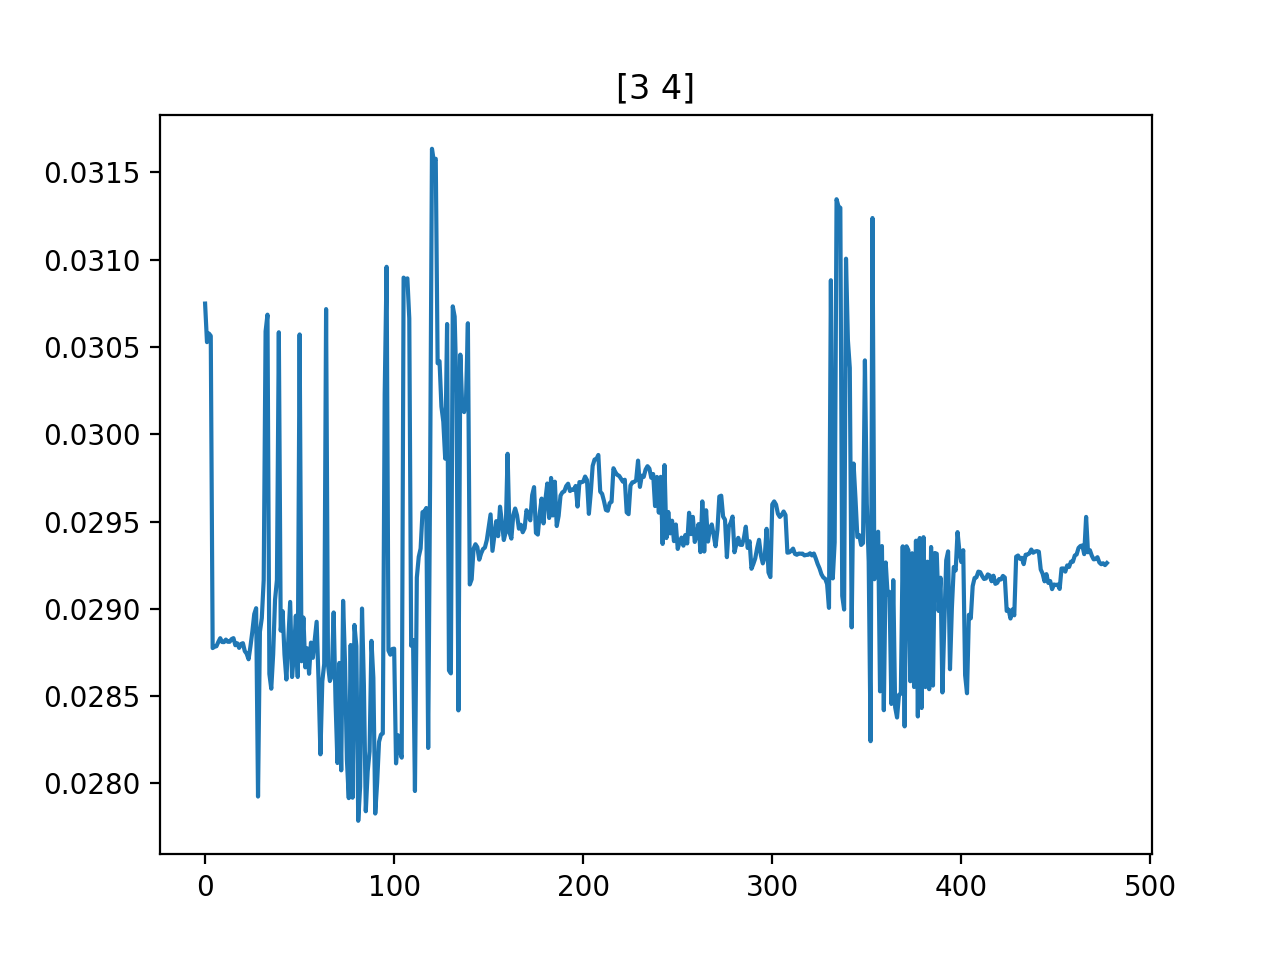

<IPython.core.display.Javascript object>


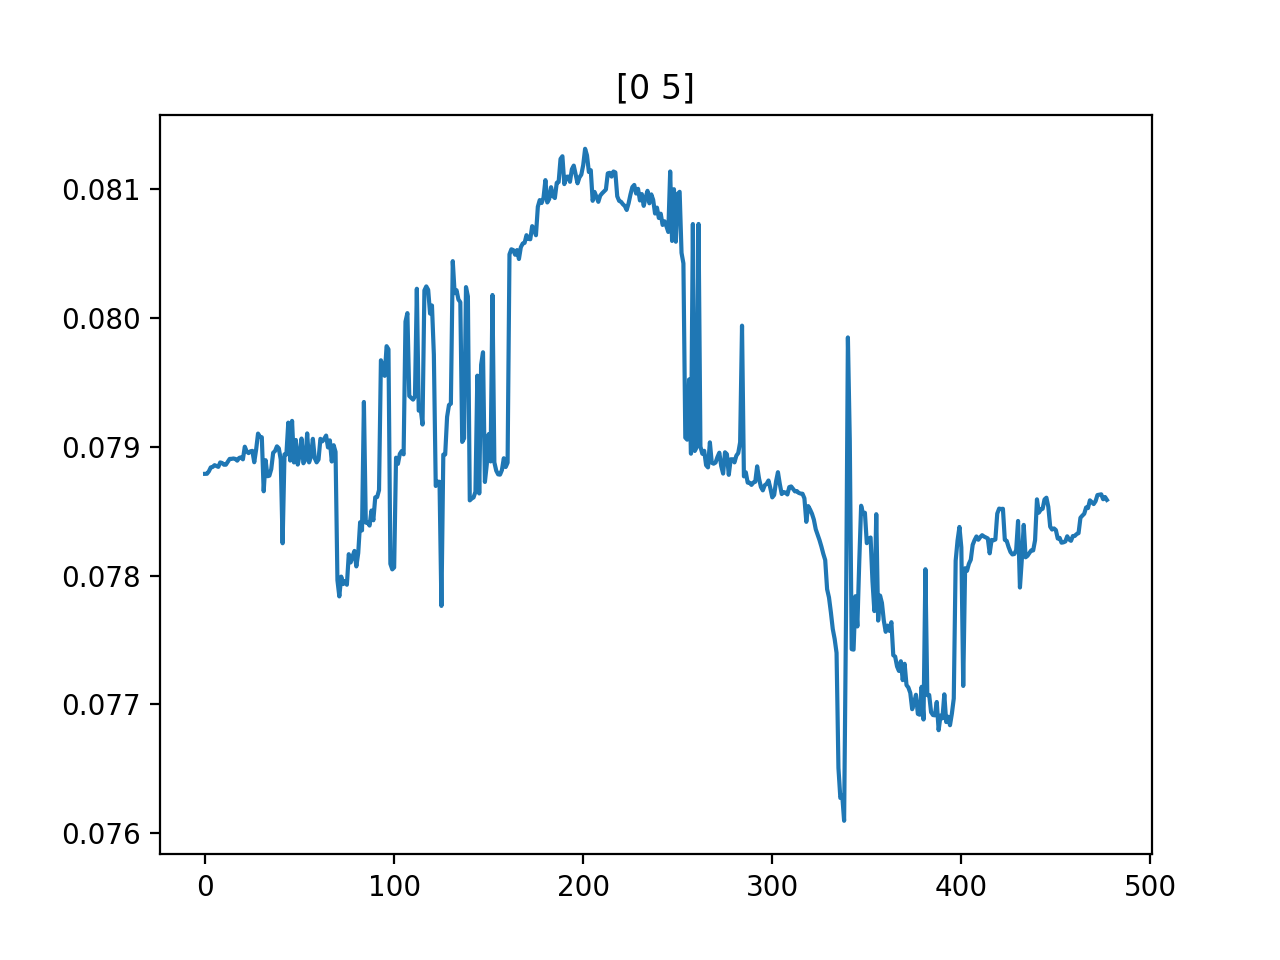

<IPython.core.display.Javascript object>


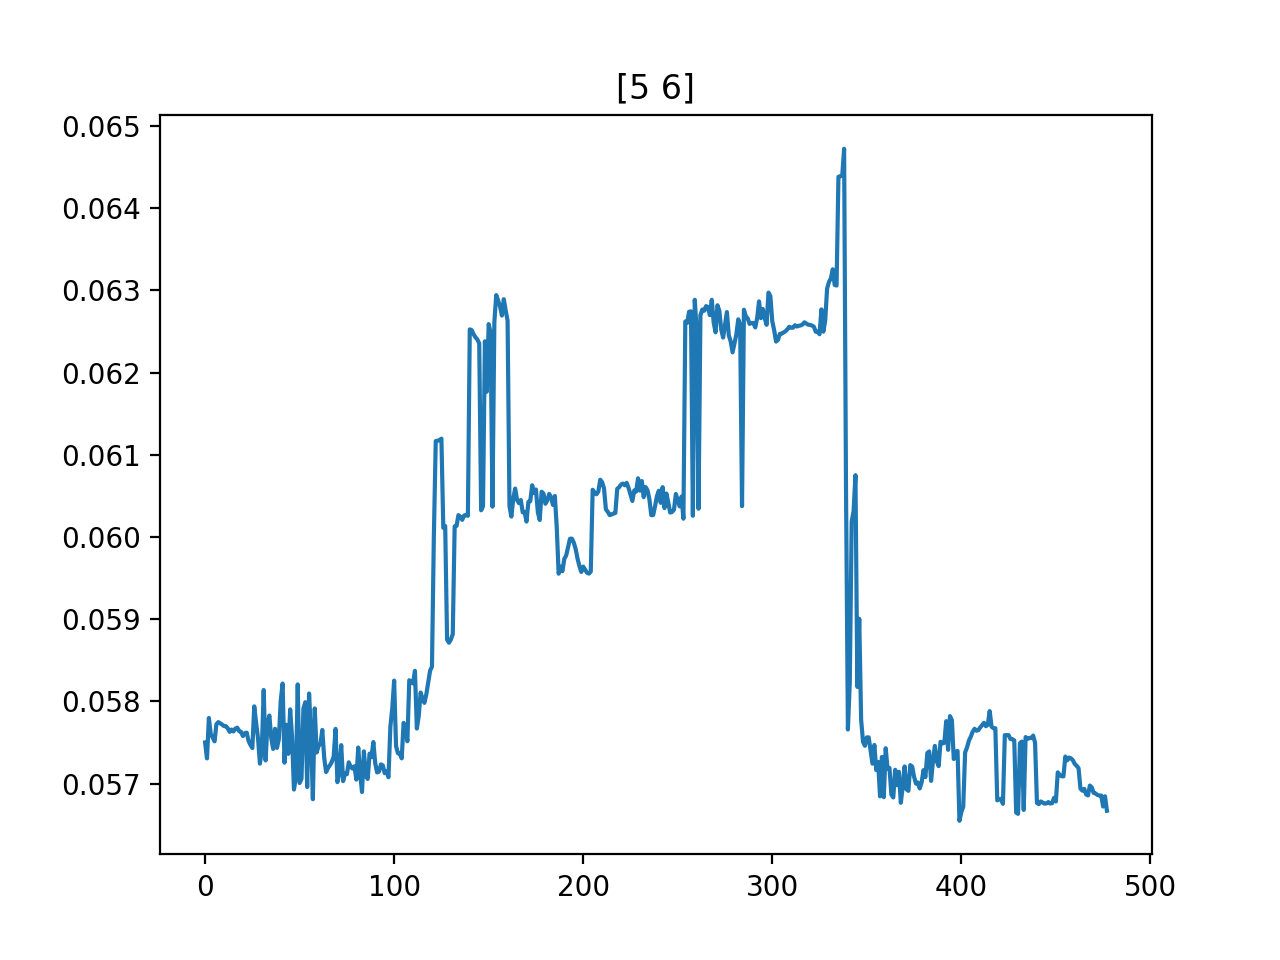

<IPython.core.display.Javascript object>


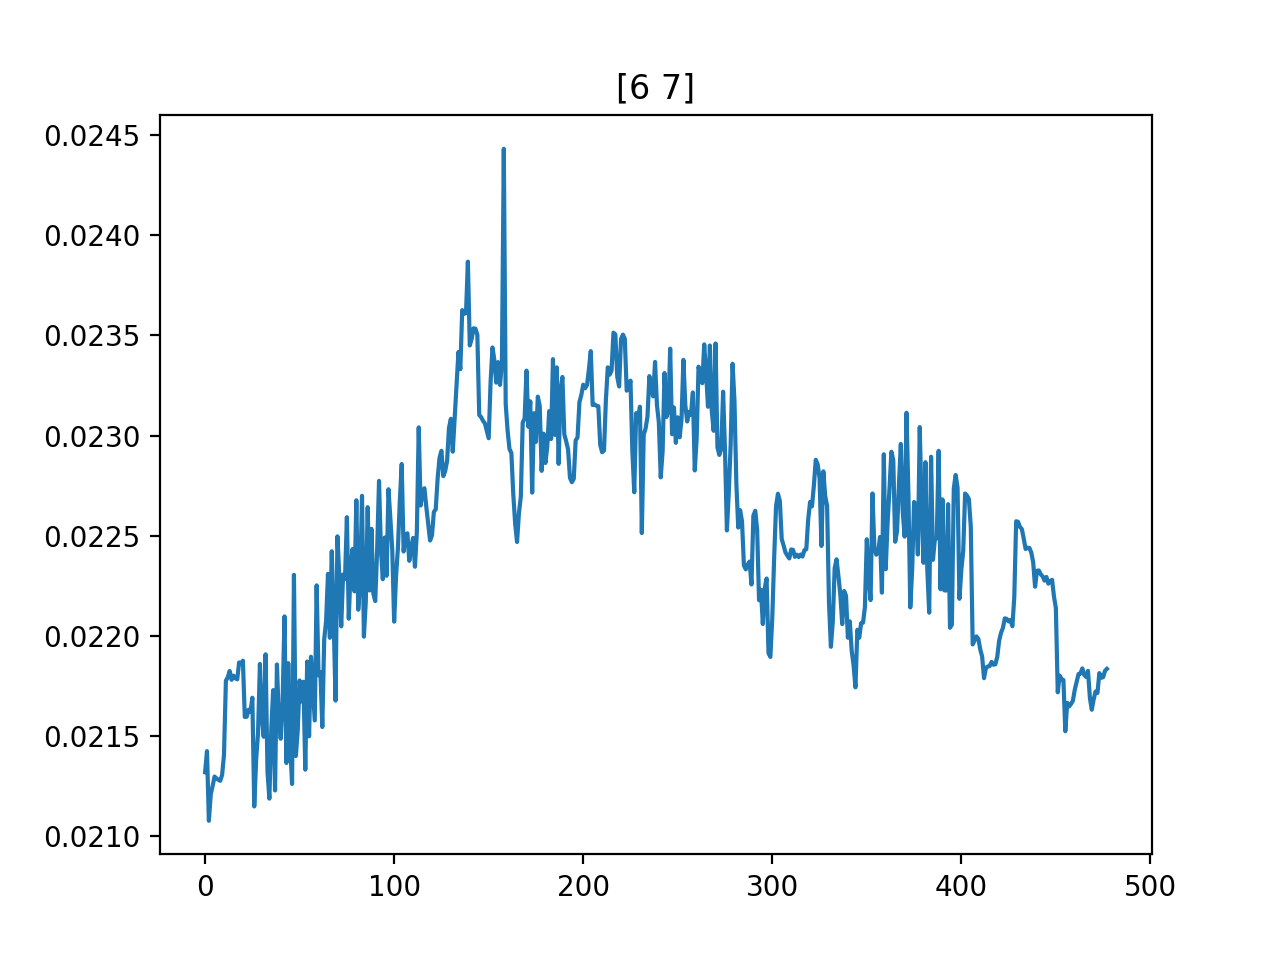

<IPython.core.display.Javascript object>


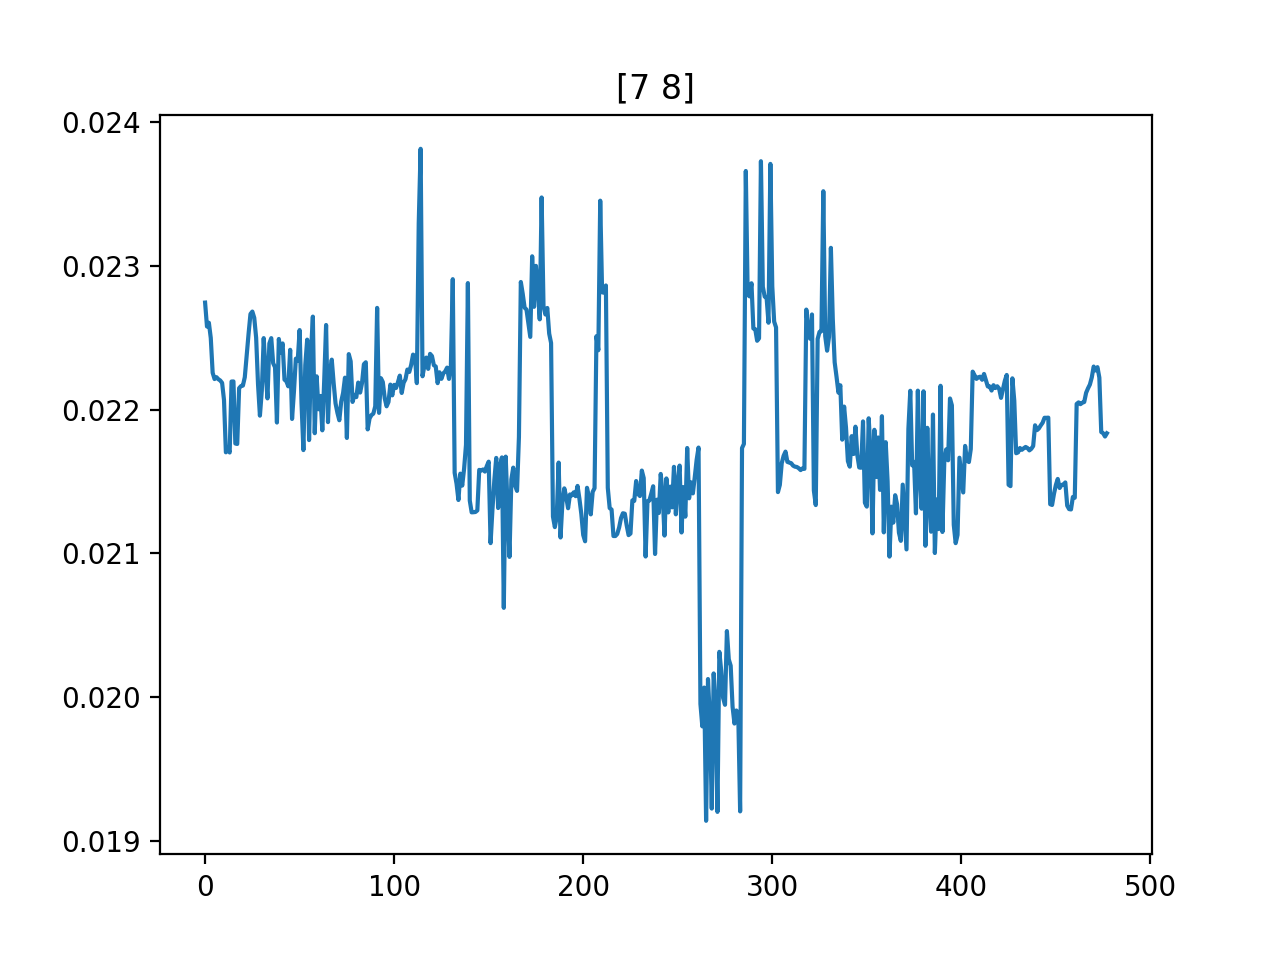

<IPython.core.display.Javascript object>


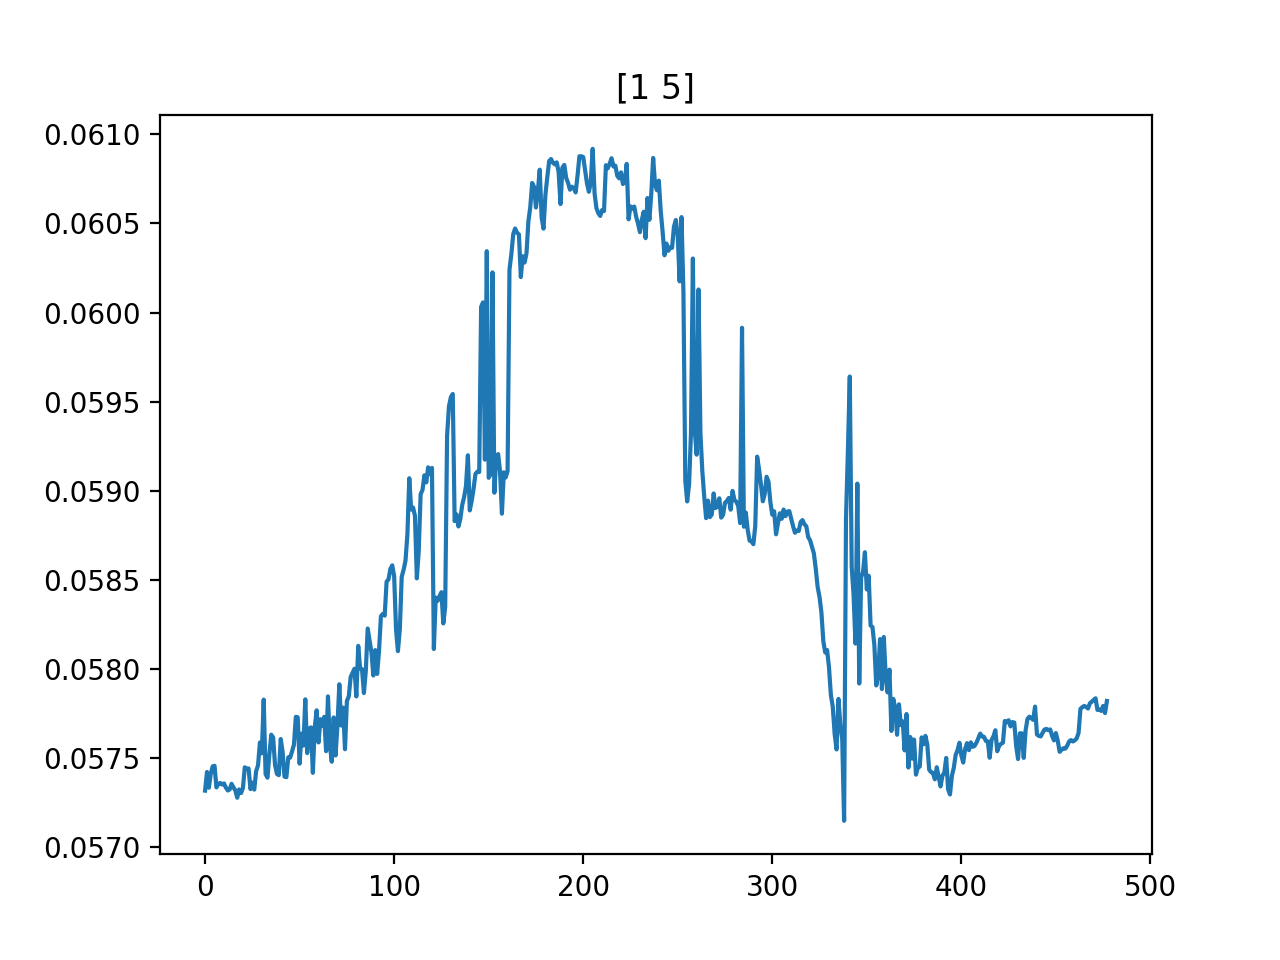

In [18]:
input_file = "vicon_data1/T02_15_2020-sLifting _Sample/t1/mMotionTracking-T02_15_2020-sLifting _Sample-t1-mocap.csv"
num_points = 9
start_index = 3
#manual_assignment(input_file, num_points, start_index)
point_mapping = [5,0,4,3,2,7,6,8,1]
data_array = find_assignment(input_file, num_points, point_mapping, start_index)
plot_data(data_array, range(0,300))
plot_link_lengths(data_array)

<IPython.core.display.Javascript object>


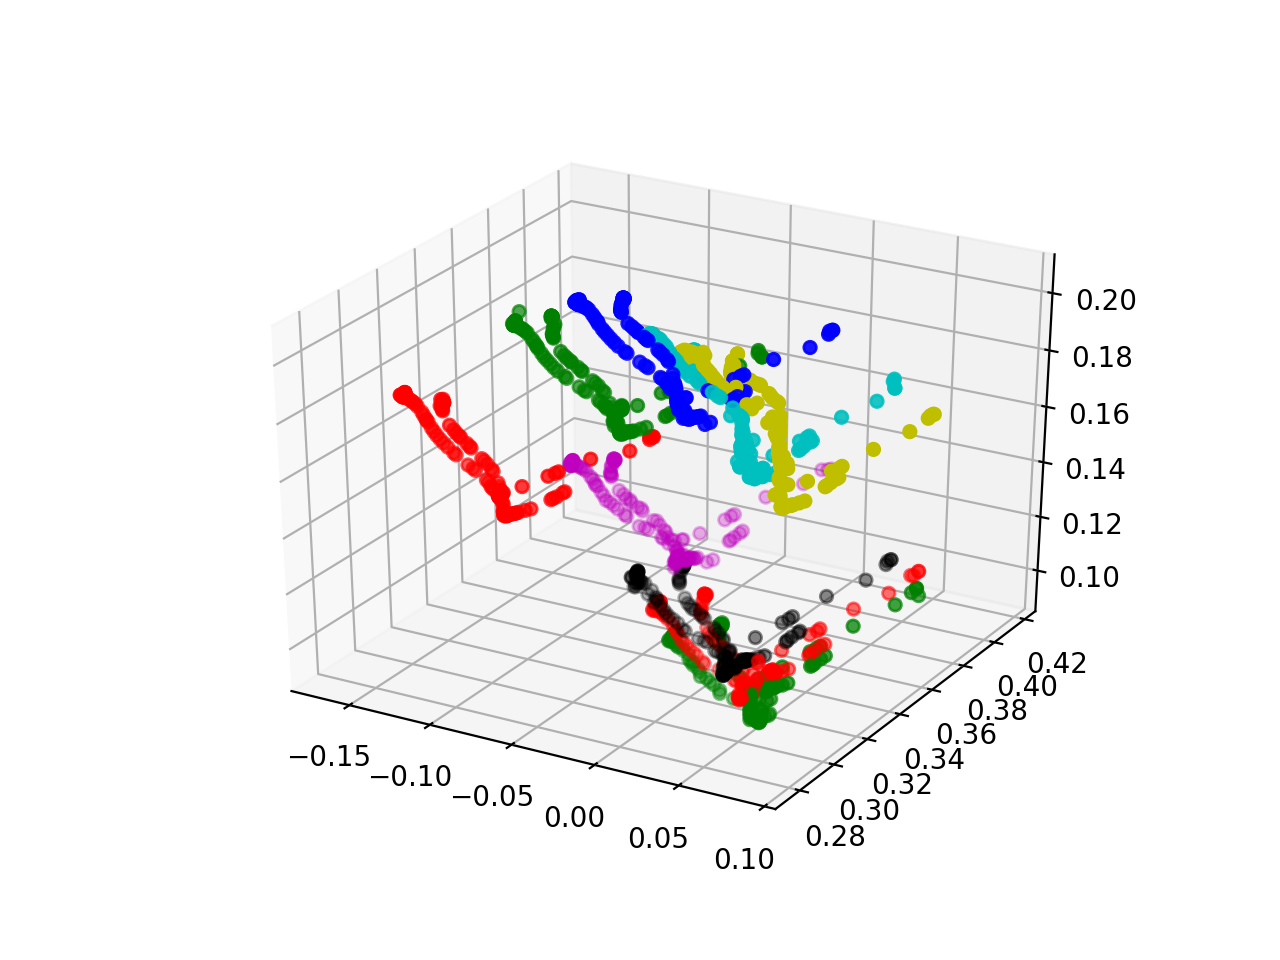

<IPython.core.display.Javascript object>


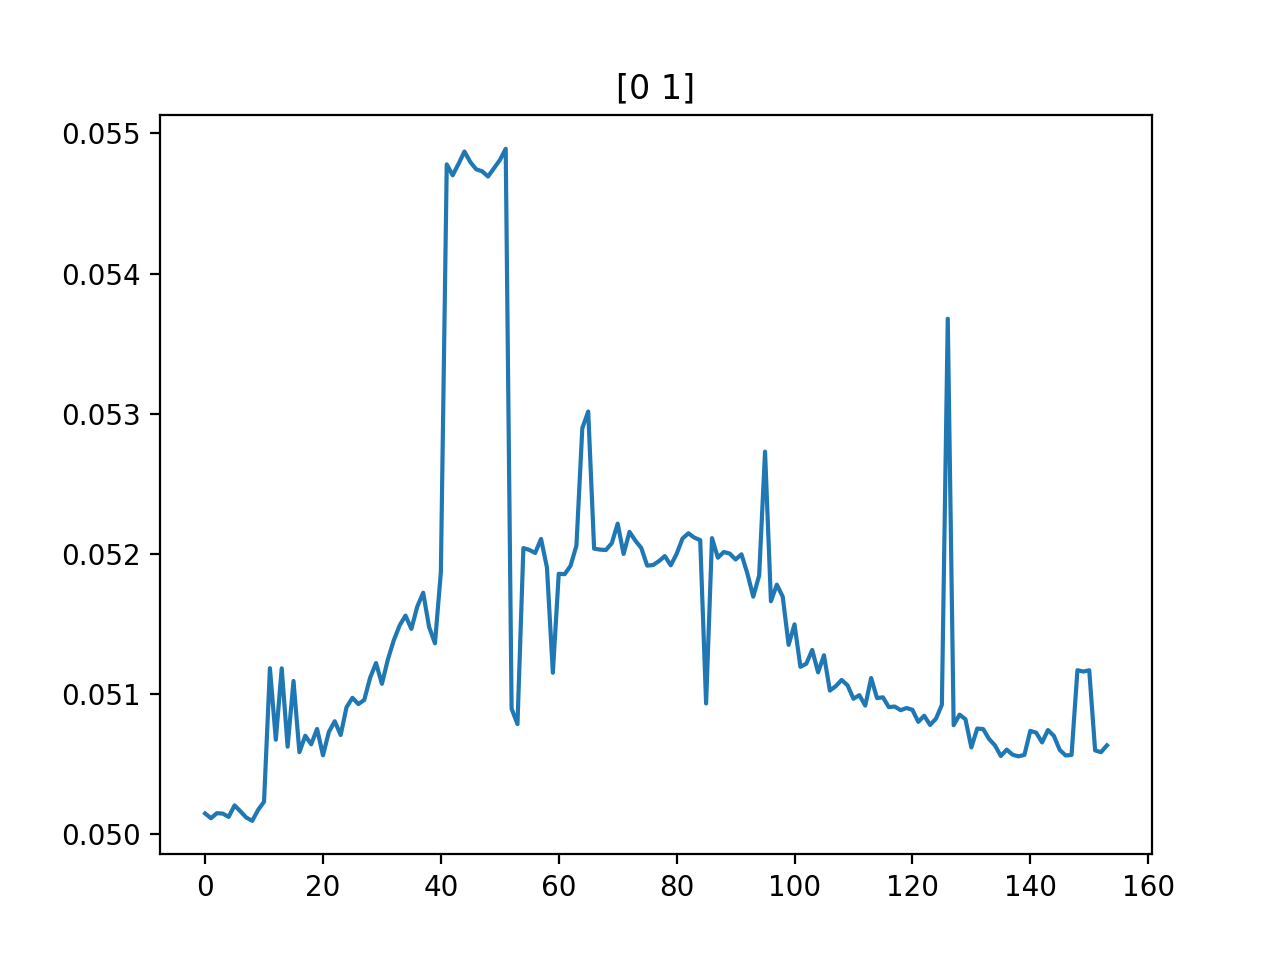

<IPython.core.display.Javascript object>


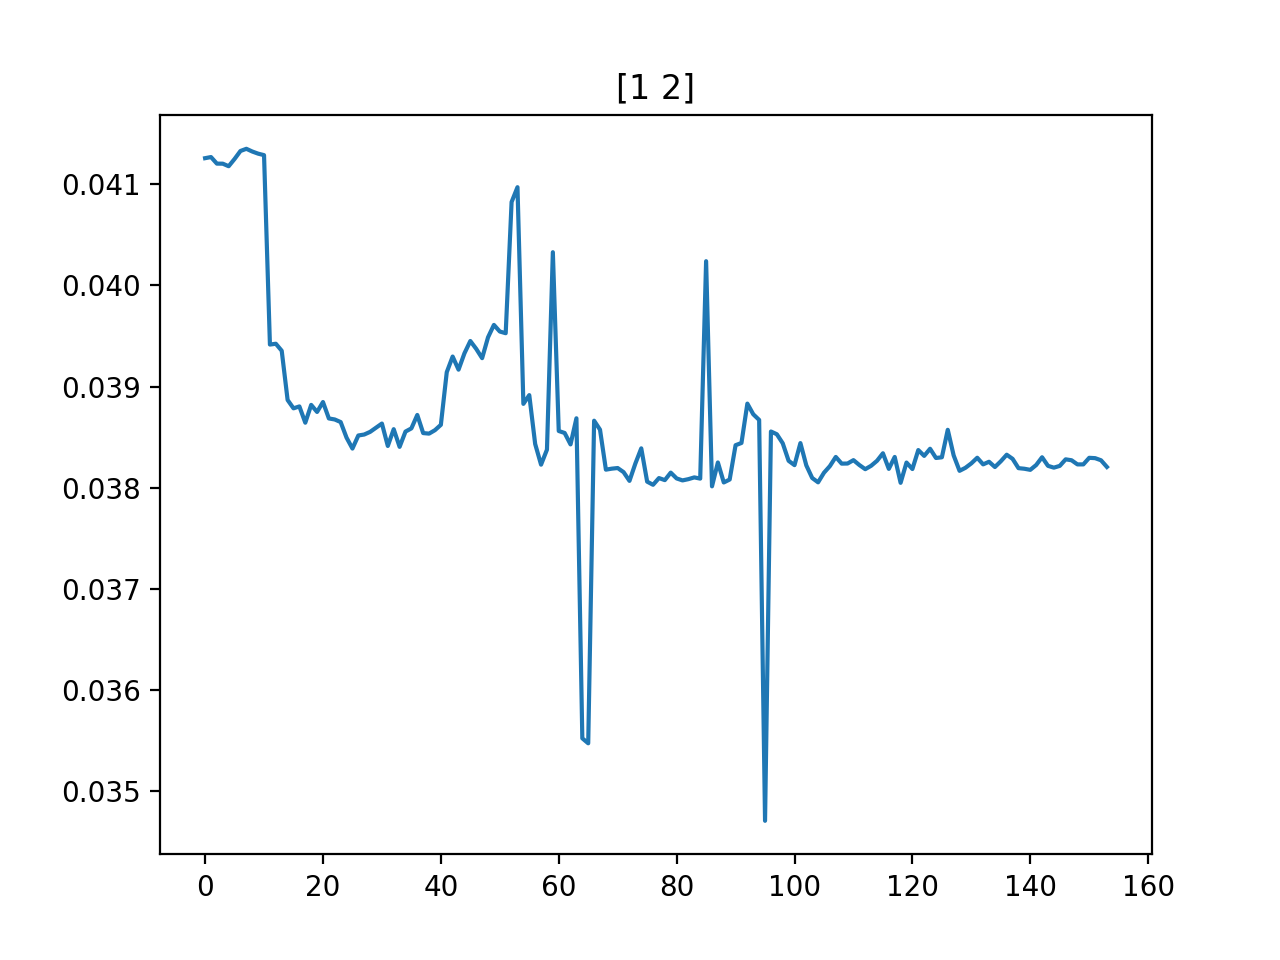

<IPython.core.display.Javascript object>


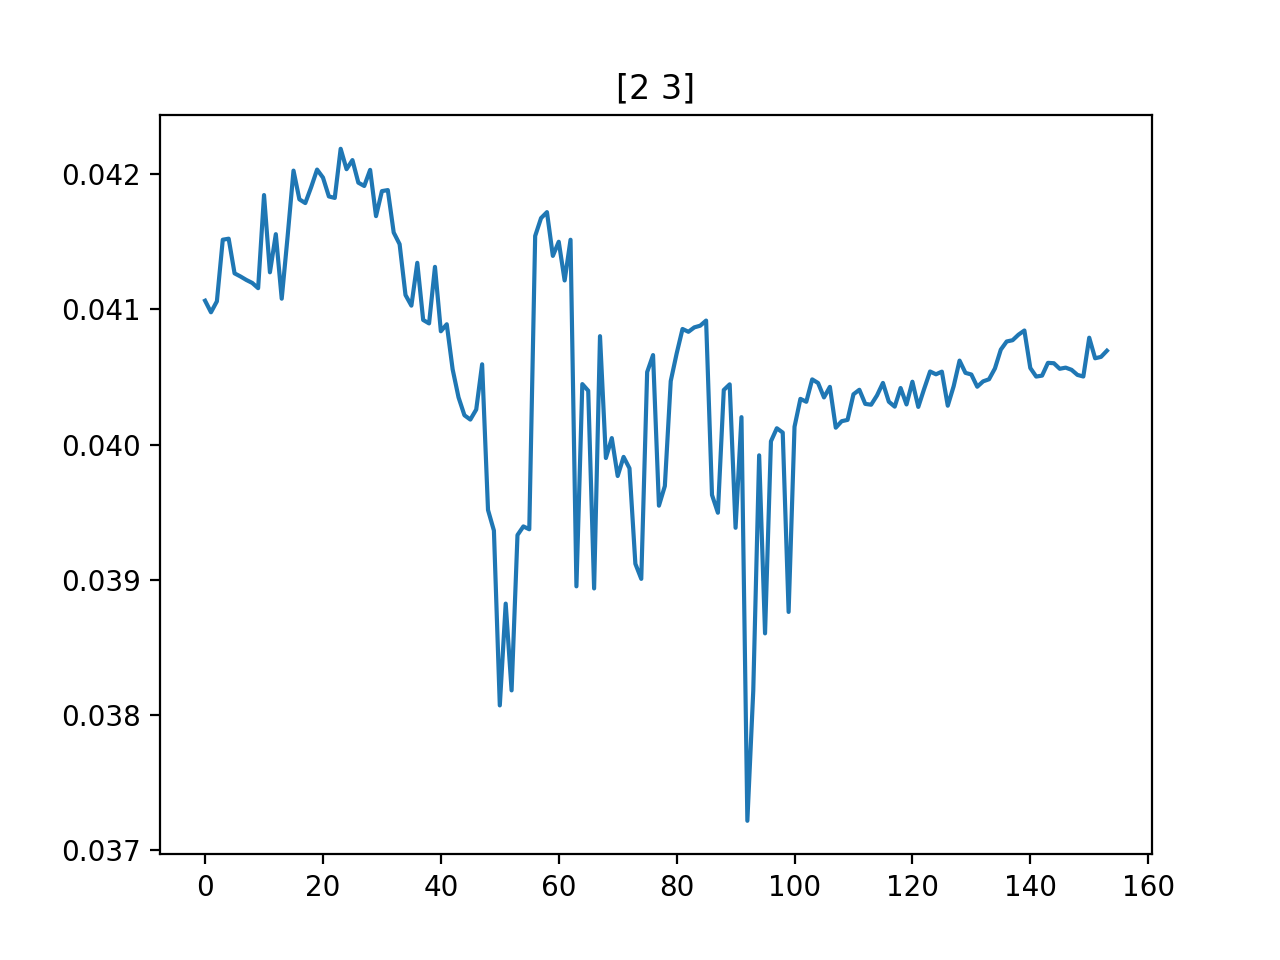

<IPython.core.display.Javascript object>


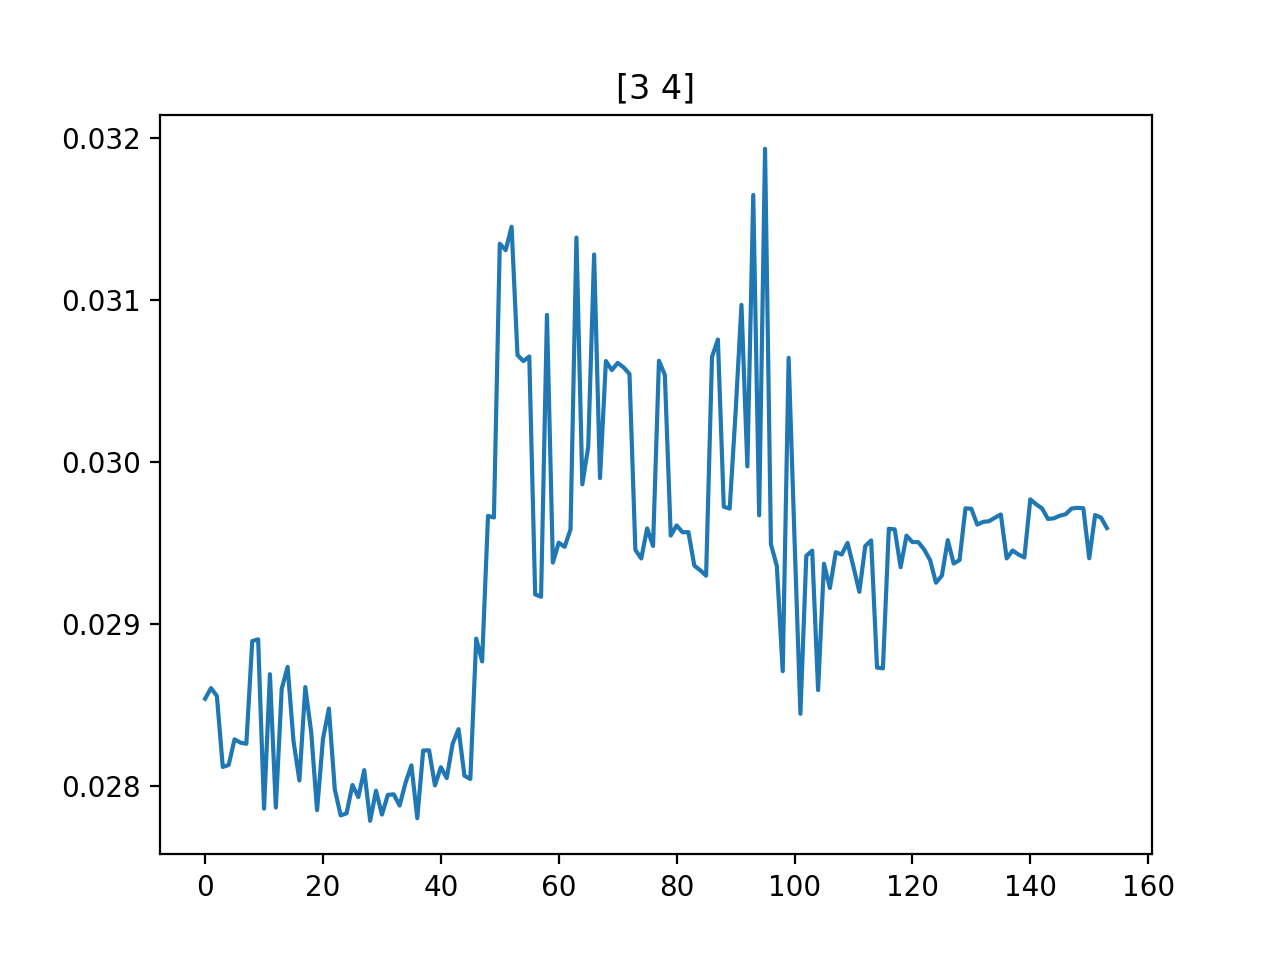

<IPython.core.display.Javascript object>


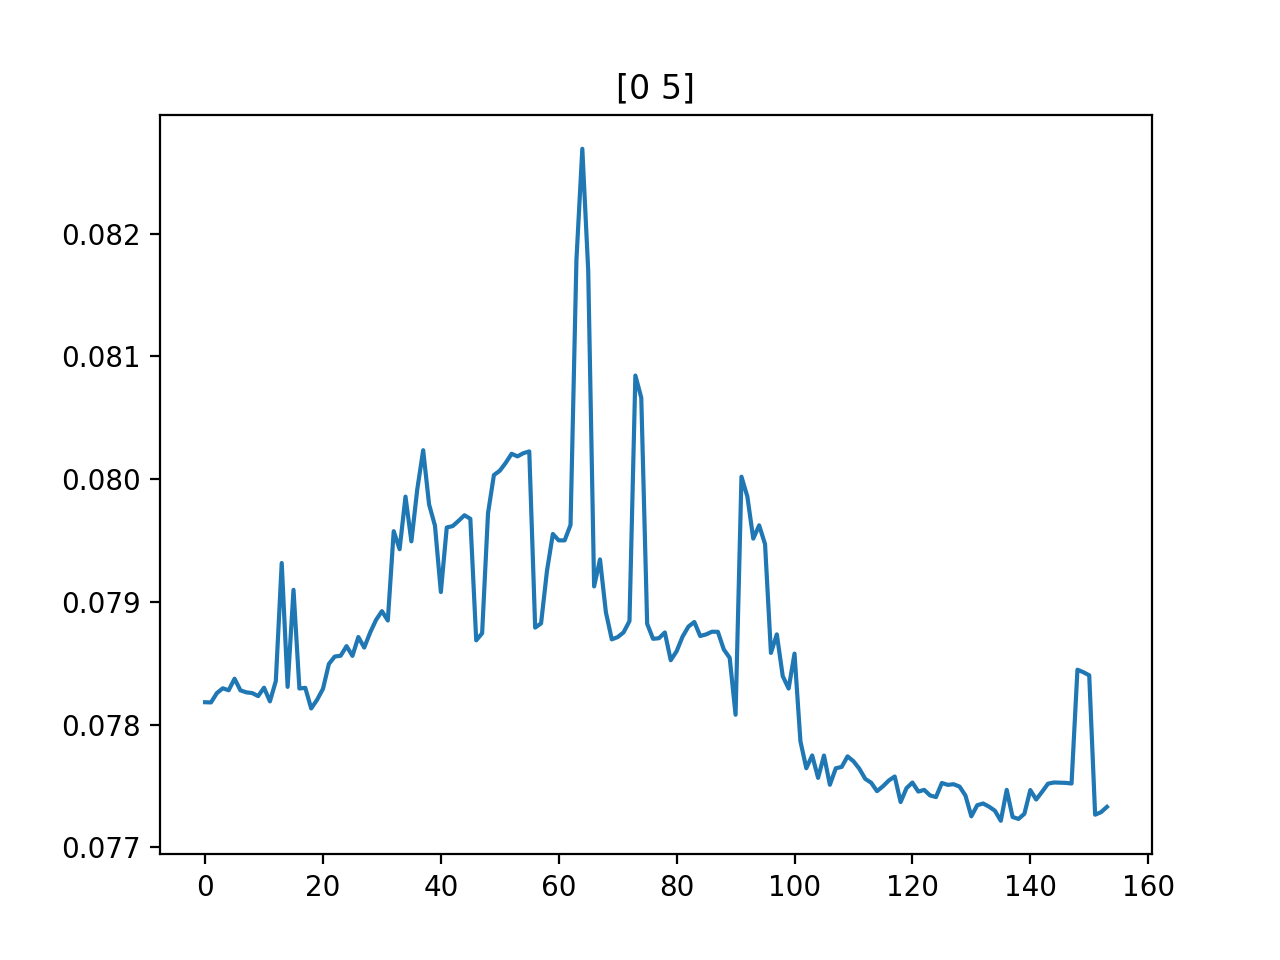

<IPython.core.display.Javascript object>


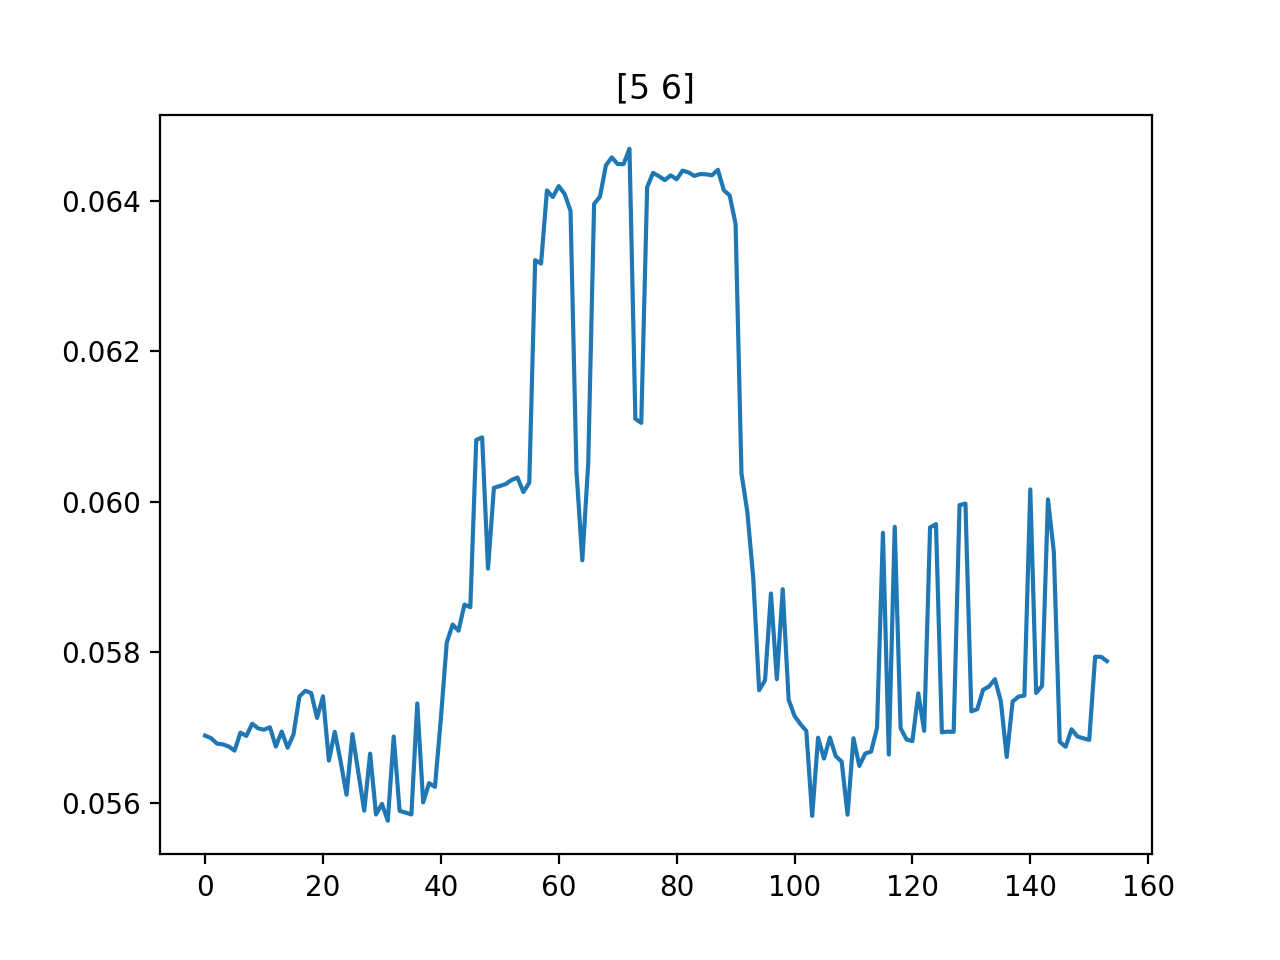

<IPython.core.display.Javascript object>


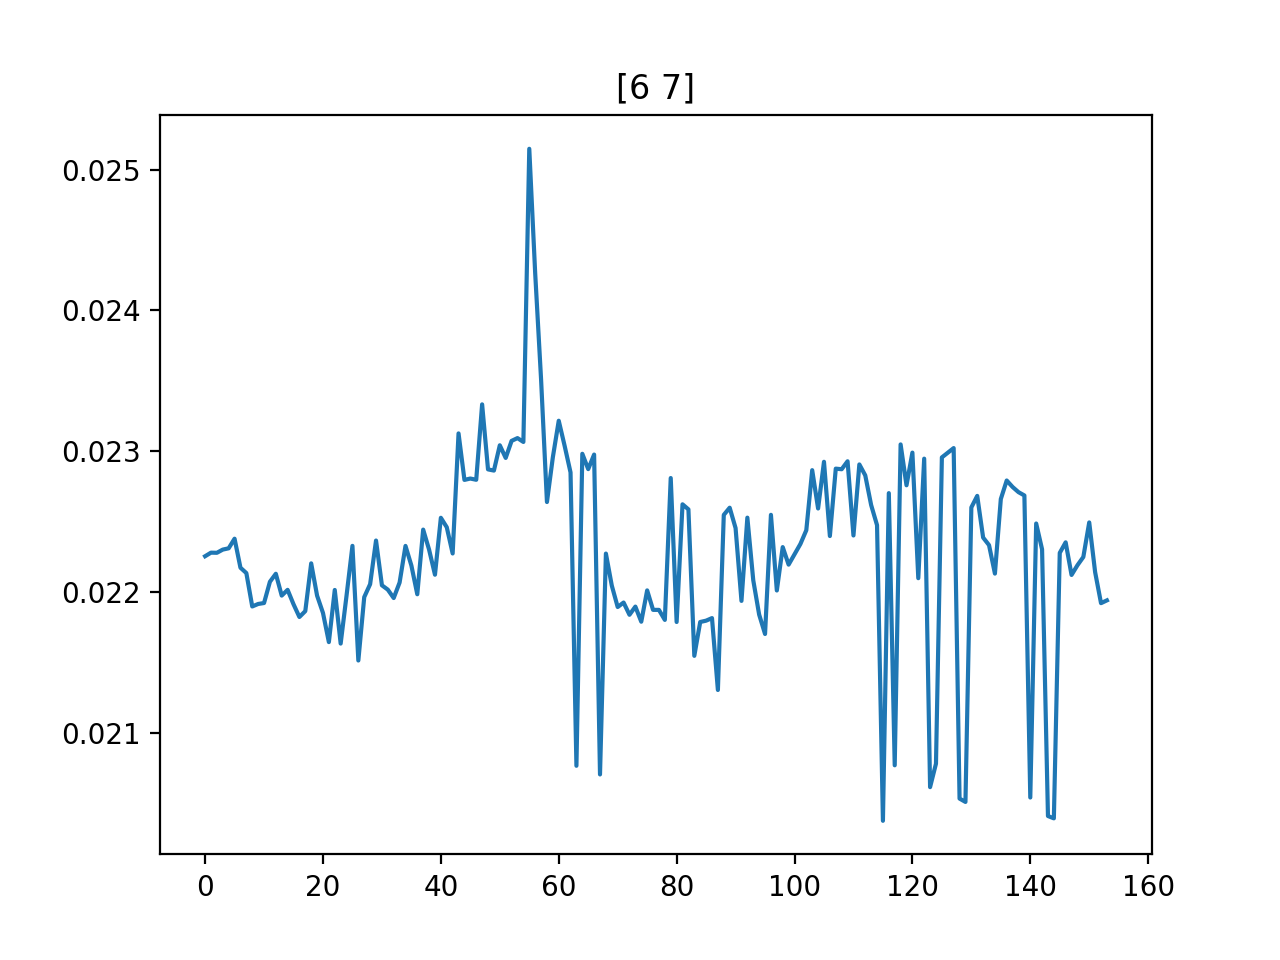

<IPython.core.display.Javascript object>


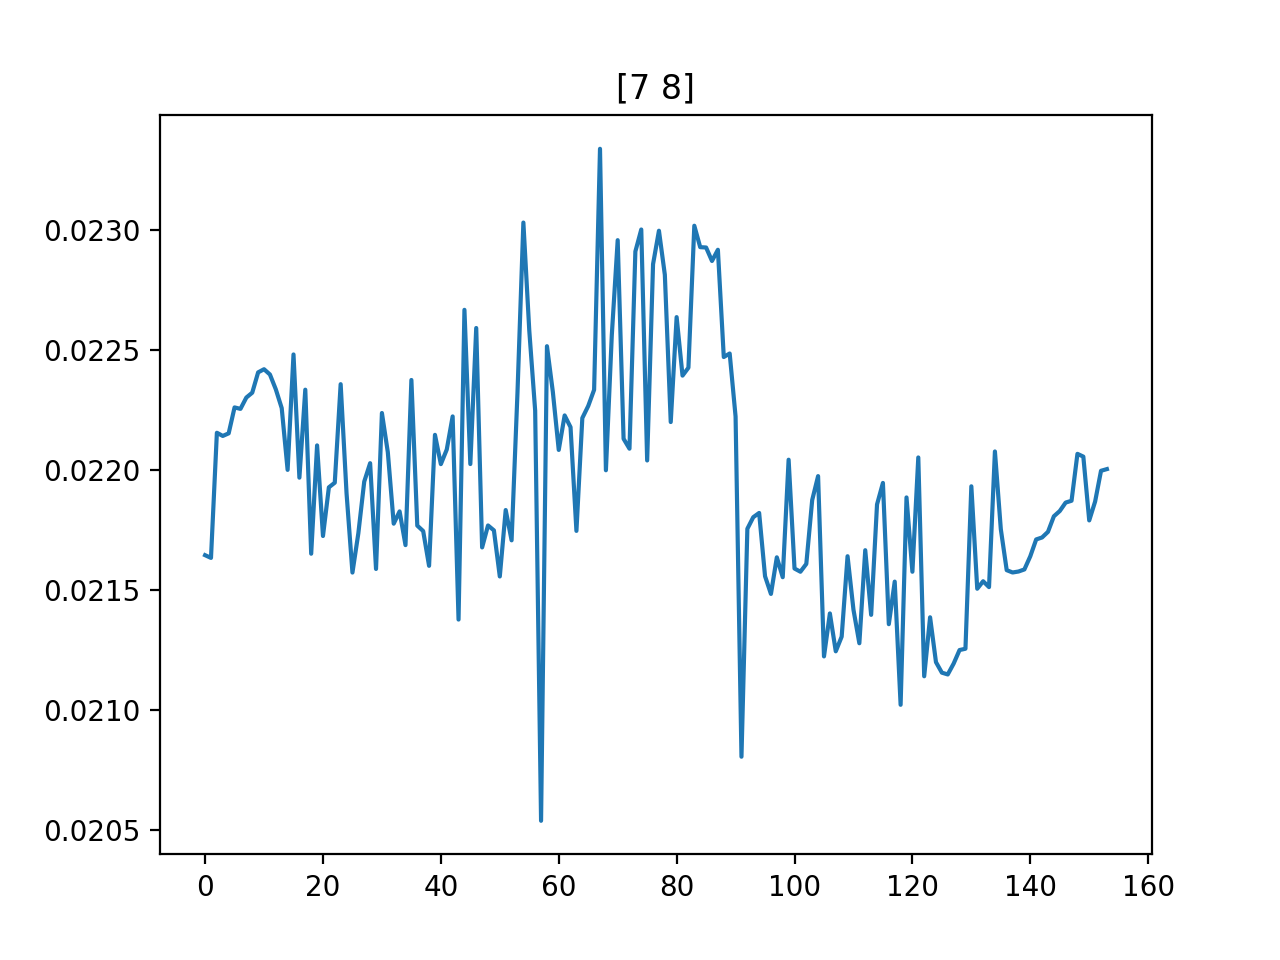

<IPython.core.display.Javascript object>


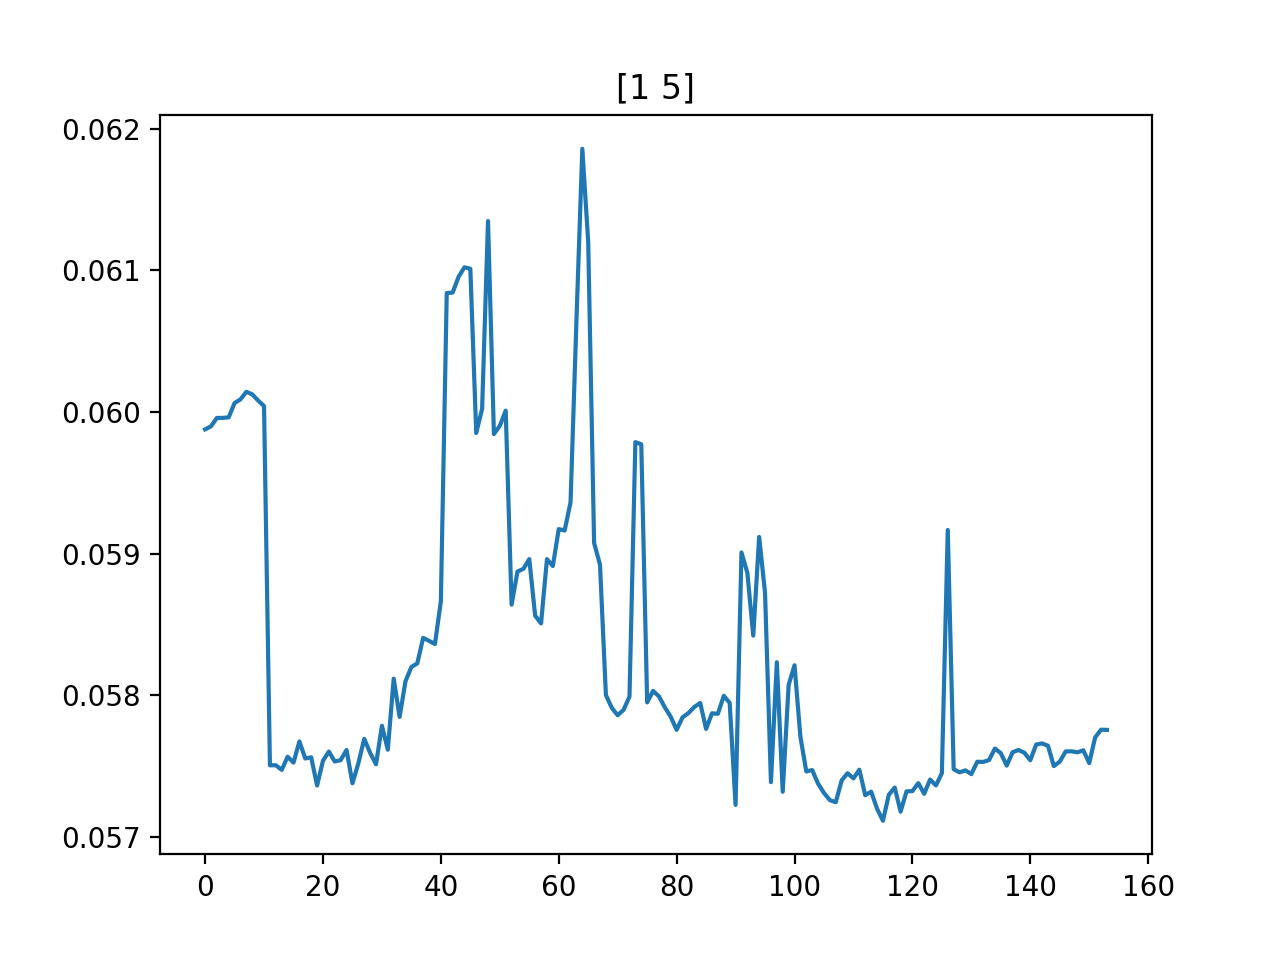

In [21]:
input_file = "vicon_data1/T02_15_2020-sLifting _Sample/t2/mMotionTracking-T02_15_2020-sLifting _Sample-t2-mocap.csv"
num_points = 9
start_index = 3
#manual_assignment(input_file, num_points, start_index)
point_mapping = [2,4,3,1,5,7,8,0,6]
data_array = find_assignment(input_file, num_points, point_mapping, start_index)
plot_data(data_array, range(0,150))
plot_link_lengths(data_array)

In [22]:
import matplotlib.pyplot as plt
plt.close('all')